# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [239]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

## 1.1 Reading Data

In [240]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [241]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [242]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

## 1.2 Pre-processing of the data

### 1.2.1 Pre-processing of the sub-cateogry values

In [243]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in tqdm(catogories):
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)






  0%|                                                                                       | 0/109248 [00:00<?, ?it/s]

  1%|▌                                                                          | 875/109248 [00:00<00:16, 6398.83it/s]

  2%|█▏                                                                        | 1828/109248 [00:00<00:15, 7038.57it/s]

 17%|████████████▏                                                            | 18233/109248 [00:00<00:09, 9873.37it/s]

 30%|█████████████████████▋                                                  | 32991/109248 [00:00<00:05, 13710.81it/s]

 47%|█████████████████████████████████▌                                      | 50972/109248 [00:00<00:03, 18965.61it/s]

 68%|████████████████████████████████████████████████▊                       | 74090/109248 [00:00<00:01, 26166.99it/s]

 89%|███████████████████████████████████████████████████████████████▉        | 96967/109248 [00:00<00:00, 35622.46it/s]

100%|█████████████████████████

In [244]:
from collections import Counter
my_counter = Counter()
for word in tqdm(project_data['clean_categories'].values):
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))



  0%|                                                                                       | 0/109248 [00:00<?, ?it/s]

 18%|████████████▋                                                          | 19596/109248 [00:00<00:00, 194470.01it/s]

 39%|███████████████████████████▋                                           | 42624/109248 [00:00<00:00, 203610.36it/s]

 60%|██████████████████████████████████████████▋                            | 65618/109248 [00:00<00:00, 210315.54it/s]

 79%|████████████████████████████████████████████████████████▏              | 86508/109248 [00:00<00:00, 209554.00it/s]

 96%|███████████████████████████████████████████████████████████████████▍  | 105167/109248 [00:00<00:00, 201613.62it/s]

100%|██████████████████████████████████████████████████████████████████████| 109248/109248 [00:00<00:00, 207822.04it/s]

### 1.2.2 preprocessing of `project_subject_subcategories`

In [245]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

### 1.2.3 Text preprocessing

In [246]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [247]:
# project_data.drop(['project_essay_1'], axis=1, inplace=True)
project_data.drop(['project_essay_2'], axis=1, inplace=True)
project_data.drop(['project_essay_3'], axis=1, inplace=True)
project_data.drop(['project_essay_4'], axis=1, inplace=True)

In [248]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                            project_resource_summary  \
0  My students need opportunities to practice beg...   
1  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   

               clean_categories           clean_subcategories  \
0             Literacy_Language                  ESL Literacy   
1  History_Civics Health_Sports  Civics_Government TeamSports   

                                               essay  
0  My students are English learners that are work...  
1  Our students arrive to our school eager to lea...

In [249]:
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [250]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [251]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in project_data['essay'].values:
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

In [252]:
# after preprocesing
preprocessed_essays[20000]

'kindergarten students varied disabilities ranging speech language delays cognitive delays gross fine motor delays autism eager beavers always strive work hardest working past limitations materials ones seek students teach title school students receive free reduced price lunch despite disabilities limitations students love coming school come eager learn explore ever felt like ants pants needed groove move meeting kids feel time want able move learn say wobble chairs answer love develop core enhances gross motor turn fine motor skills also want learn games kids not want sit worksheets want learn count jumping playing physical engagement key success number toss color shape mats make happen students forget work fun 6 year old deserves nannan'

In [253]:
project_data['essay'] = preprocessed_essays

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [254]:
# similarly you can preprocess the titles also
preprocessed_titles = []
# tqdm is for printing the status bar
for sentance in project_data['project_title'].values:
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_titles.append(sent.lower().strip())

In [255]:
preprocessed_titles[20000]

'need move input'

In [256]:
project_data['project_title'] = preprocessed_titles

### 1.4.1 Preprocessing of the teacher_prefix

In [257]:
project_data['teacher_prefix'].fillna("Others",inplace = True)
set(project_data['teacher_prefix'].values)

{'Dr.', 'Mr.', 'Mrs.', 'Ms.', 'Others', 'Teacher'}

### 1.4.2 Preprocessing of the price

In [258]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')

###  1.4.3 Preprocessing of the Project_grad

In [276]:
lst = list(project_data['project_grade_category'].values)
preprocessed_grades = []
for l in lst:
    l = l.replace(' ','_')
    preprocessed_grades.append(l)
set(preprocessed_grades)

{'Grades_3-5', 'Grades_6-8', 'Grades_9-12', 'Grades_PreK-2'}

In [278]:
project_data['project_grade_category'] = preprocessed_grades

### 1.4.3 Sentimental Score of pre-processed essay

In [259]:
essays = project_data['essay'].copy()

In [260]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

sent_essays = []
no_essays = []

for essay in tqdm(essays):
    ss = sid.polarity_scores(essay)
    sent_essays.append(ss['compound'])
    no_essays.append(len(essay.split(' ')))



  0%|                                                                                       | 0/109248 [00:00<?, ?it/s]

  0%|                                                                               | 4/109248 [00:00<45:48, 39.74it/s]

  0%|                                                                              | 20/109248 [00:00<35:32, 51.23it/s]

  0%|                                                                              | 52/109248 [00:00<26:37, 68.37it/s]

  0%|                                                                              | 80/109248 [00:00<20:39, 88.11it/s]

  0%|                                                                            | 114/109248 [00:00<16:05, 113.08it/s]

  0%|                                                                            | 152/109248 [00:00<12:42, 143.00it/s]

  0%|▏                                                                           | 182/109248 [00:00<10:45, 168.86it/s]

  0%|▏                        

  2%|█▌                                                                         | 2236/109248 [00:07<04:50, 368.08it/s]

  2%|█▌                                                                         | 2274/109248 [00:07<04:56, 361.33it/s]

  2%|█▌                                                                         | 2311/109248 [00:07<04:57, 358.89it/s]

  2%|█▌                                                                         | 2348/109248 [00:07<04:59, 357.09it/s]

  2%|█▋                                                                         | 2384/109248 [00:07<05:02, 353.10it/s]

  2%|█▋                                                                         | 2420/109248 [00:07<05:03, 352.26it/s]

  2%|█▋                                                                         | 2456/109248 [00:07<05:02, 352.78it/s]

  2%|█▋                                                                         | 2493/109248 [00:07<05:00, 354.97it/s]

  2%|█▋                         

  4%|███▏                                                                       | 4653/109248 [00:14<05:01, 347.15it/s]

  4%|███▏                                                                       | 4692/109248 [00:14<04:53, 356.22it/s]

  4%|███▏                                                                       | 4728/109248 [00:14<04:56, 352.45it/s]

  4%|███▎                                                                       | 4764/109248 [00:14<04:56, 351.81it/s]

  4%|███▎                                                                       | 4800/109248 [00:14<04:57, 351.47it/s]

  4%|███▎                                                                       | 4836/109248 [00:14<04:56, 352.19it/s]

  4%|███▎                                                                       | 4872/109248 [00:14<05:00, 347.57it/s]

  4%|███▎                                                                       | 4907/109248 [00:14<05:07, 339.51it/s]

  5%|███▍                       

  6%|████▊                                                                      | 7057/109248 [00:21<04:53, 348.69it/s]

  6%|████▊                                                                      | 7097/109248 [00:21<04:42, 361.95it/s]

  7%|████▉                                                                      | 7134/109248 [00:21<04:57, 343.36it/s]

  7%|████▉                                                                      | 7169/109248 [00:21<04:59, 340.53it/s]

  7%|████▉                                                                      | 7205/109248 [00:21<04:55, 345.38it/s]

  7%|████▉                                                                      | 7240/109248 [00:21<04:58, 342.00it/s]

  7%|████▉                                                                      | 7275/109248 [00:21<04:59, 340.62it/s]

  7%|█████                                                                      | 7310/109248 [00:21<05:00, 339.63it/s]

  7%|█████                      

  9%|██████▍                                                                    | 9464/109248 [00:28<04:27, 372.65it/s]

  9%|██████▌                                                                    | 9502/109248 [00:28<04:35, 362.24it/s]

  9%|██████▌                                                                    | 9542/109248 [00:28<04:28, 371.01it/s]

  9%|██████▌                                                                    | 9580/109248 [00:28<04:33, 364.31it/s]

  9%|██████▌                                                                    | 9617/109248 [00:28<04:34, 363.09it/s]

  9%|██████▋                                                                    | 9654/109248 [00:28<04:37, 359.02it/s]

  9%|██████▋                                                                    | 9691/109248 [00:28<04:44, 350.21it/s]

  9%|██████▋                                                                    | 9727/109248 [00:29<04:49, 343.28it/s]

  9%|██████▋                    

 11%|████████                                                                  | 11942/109248 [00:35<04:33, 356.19it/s]

 11%|████████                                                                  | 11982/109248 [00:35<04:25, 366.51it/s]

 11%|████████▏                                                                 | 12019/109248 [00:35<04:33, 355.17it/s]

 11%|████████▏                                                                 | 12057/109248 [00:35<04:30, 359.23it/s]

 11%|████████▏                                                                 | 12094/109248 [00:35<04:34, 353.58it/s]

 11%|████████▏                                                                 | 12130/109248 [00:35<04:33, 354.72it/s]

 11%|████████▏                                                                 | 12166/109248 [00:36<04:38, 348.31it/s]

 11%|████████▎                                                                 | 12202/109248 [00:36<04:36, 351.02it/s]

 11%|████████▎                  

 13%|█████████▊                                                                | 14406/109248 [00:42<04:52, 324.27it/s]

 13%|█████████▊                                                                | 14442/109248 [00:42<04:44, 333.54it/s]

 13%|█████████▊                                                                | 14483/109248 [00:42<04:30, 350.86it/s]

 13%|█████████▊                                                                | 14519/109248 [00:42<04:32, 348.14it/s]

 13%|█████████▊                                                                | 14555/109248 [00:42<04:45, 331.44it/s]

 13%|█████████▉                                                                | 14591/109248 [00:43<04:39, 338.65it/s]

 13%|█████████▉                                                                | 14628/109248 [00:43<04:32, 346.78it/s]

 13%|█████████▉                                                                | 14664/109248 [00:43<04:36, 342.03it/s]

 13%|█████████▉                 

 15%|███████████▍                                                              | 16838/109248 [00:49<04:51, 317.36it/s]

 15%|███████████▍                                                              | 16871/109248 [00:49<04:53, 314.28it/s]

 15%|███████████▍                                                              | 16908/109248 [00:49<04:40, 328.88it/s]

 16%|███████████▍                                                              | 16942/109248 [00:49<04:39, 330.04it/s]

 16%|███████████▍                                                              | 16976/109248 [00:50<04:45, 322.73it/s]

 16%|███████████▌                                                              | 17009/109248 [00:50<04:45, 322.64it/s]

 16%|███████████▌                                                              | 17042/109248 [00:50<04:45, 322.72it/s]

 16%|███████████▌                                                              | 17082/109248 [00:50<04:29, 342.21it/s]

 16%|███████████▌               

 18%|█████████████                                                             | 19236/109248 [00:56<04:06, 365.87it/s]

 18%|█████████████                                                             | 19273/109248 [00:56<04:16, 350.52it/s]

 18%|█████████████                                                             | 19309/109248 [00:56<04:41, 319.77it/s]

 18%|█████████████                                                             | 19342/109248 [00:57<04:43, 317.59it/s]

 18%|█████████████                                                             | 19375/109248 [00:57<05:22, 278.47it/s]

 18%|█████████████▏                                                            | 19405/109248 [00:57<05:23, 277.71it/s]

 18%|█████████████▏                                                            | 19434/109248 [00:57<05:32, 270.43it/s]

 18%|█████████████▏                                                            | 19467/109248 [00:57<05:14, 285.42it/s]

 18%|█████████████▏             

 20%|██████████████▌                                                           | 21422/109248 [01:04<05:11, 282.18it/s]

 20%|██████████████▌                                                           | 21451/109248 [01:04<05:26, 268.91it/s]

 20%|██████████████▌                                                           | 21479/109248 [01:04<05:41, 257.37it/s]

 20%|██████████████▌                                                           | 21506/109248 [01:04<06:24, 228.21it/s]

 20%|██████████████▌                                                           | 21530/109248 [01:04<06:26, 227.20it/s]

 20%|██████████████▌                                                           | 21556/109248 [01:04<06:14, 234.40it/s]

 20%|██████████████▌                                                           | 21588/109248 [01:04<05:45, 253.80it/s]

 20%|██████████████▋                                                           | 21619/109248 [01:04<05:27, 267.20it/s]

 20%|██████████████▋            

 22%|███████████████▉                                                          | 23490/109248 [01:11<05:49, 245.10it/s]

 22%|███████████████▉                                                          | 23519/109248 [01:11<05:35, 255.87it/s]

 22%|███████████████▉                                                          | 23545/109248 [01:11<05:42, 249.90it/s]

 22%|███████████████▉                                                          | 23578/109248 [01:11<05:20, 267.09it/s]

 22%|███████████████▉                                                          | 23609/109248 [01:11<05:07, 278.11it/s]

 22%|████████████████                                                          | 23641/109248 [01:12<04:57, 287.36it/s]

 22%|████████████████                                                          | 23677/109248 [01:12<04:40, 305.30it/s]

 22%|████████████████                                                          | 23713/109248 [01:12<04:28, 318.40it/s]

 22%|████████████████           

 23%|█████████████████▍                                                        | 25658/109248 [01:18<04:55, 283.12it/s]

 24%|█████████████████▍                                                        | 25687/109248 [01:18<05:09, 270.23it/s]

 24%|█████████████████▍                                                        | 25719/109248 [01:18<04:56, 282.16it/s]

 24%|█████████████████▍                                                        | 25750/109248 [01:19<04:49, 288.58it/s]

 24%|█████████████████▍                                                        | 25783/109248 [01:19<04:39, 298.38it/s]

 24%|█████████████████▍                                                        | 25815/109248 [01:19<04:36, 302.29it/s]

 24%|█████████████████▌                                                        | 25846/109248 [01:19<04:38, 299.71it/s]

 24%|█████████████████▌                                                        | 25877/109248 [01:19<05:10, 268.88it/s]

 24%|█████████████████▌         

 25%|██████████████████▊                                                       | 27798/109248 [01:26<04:42, 288.70it/s]

 25%|██████████████████▊                                                       | 27828/109248 [01:26<05:15, 258.21it/s]

 25%|██████████████████▊                                                       | 27855/109248 [01:26<05:22, 252.47it/s]

 26%|██████████████████▉                                                       | 27881/109248 [01:26<05:26, 249.04it/s]

 26%|██████████████████▉                                                       | 27908/109248 [01:26<05:22, 252.31it/s]

 26%|██████████████████▉                                                       | 27941/109248 [01:26<05:02, 269.02it/s]

 26%|██████████████████▉                                                       | 27978/109248 [01:27<04:38, 291.81it/s]

 26%|██████████████████▉                                                       | 28013/109248 [01:27<04:26, 304.94it/s]

 26%|██████████████████▉        

 27%|████████████████████▏                                                     | 29881/109248 [01:33<04:40, 282.99it/s]

 27%|████████████████████▎                                                     | 29911/109248 [01:33<04:36, 286.98it/s]

 27%|████████████████████▎                                                     | 29946/109248 [01:33<04:22, 302.30it/s]

 27%|████████████████████▎                                                     | 29980/109248 [01:33<04:14, 311.21it/s]

 27%|████████████████████▎                                                     | 30012/109248 [01:34<04:39, 284.00it/s]

 28%|████████████████████▎                                                     | 30044/109248 [01:34<04:29, 293.35it/s]

 28%|████████████████████▎                                                     | 30079/109248 [01:34<04:17, 307.69it/s]

 28%|████████████████████▍                                                     | 30114/109248 [01:34<04:09, 317.73it/s]

 28%|████████████████████▍      

 30%|█████████████████████▊                                                    | 32261/109248 [01:40<04:33, 280.98it/s]

 30%|█████████████████████▊                                                    | 32290/109248 [01:41<04:39, 275.78it/s]

 30%|█████████████████████▉                                                    | 32318/109248 [01:41<04:48, 266.95it/s]

 30%|█████████████████████▉                                                    | 32345/109248 [01:41<04:56, 259.61it/s]

 30%|█████████████████████▉                                                    | 32372/109248 [01:41<04:55, 260.55it/s]

 30%|█████████████████████▉                                                    | 32400/109248 [01:41<04:49, 265.56it/s]

 30%|█████████████████████▉                                                    | 32436/109248 [01:41<04:27, 287.01it/s]

 30%|█████████████████████▉                                                    | 32466/109248 [01:41<04:26, 288.55it/s]

 30%|██████████████████████     

 32%|███████████████████████▎                                                  | 34477/109248 [01:48<03:18, 375.88it/s]

 32%|███████████████████████▍                                                  | 34518/109248 [01:48<03:14, 384.72it/s]

 32%|███████████████████████▍                                                  | 34559/109248 [01:48<03:12, 388.90it/s]

 32%|███████████████████████▍                                                  | 34600/109248 [01:48<03:09, 394.11it/s]

 32%|███████████████████████▍                                                  | 34643/109248 [01:48<03:05, 402.32it/s]

 32%|███████████████████████▍                                                  | 34688/109248 [01:48<03:00, 413.59it/s]

 32%|███████████████████████▌                                                  | 34731/109248 [01:49<02:58, 417.34it/s]

 32%|███████████████████████▌                                                  | 34774/109248 [01:49<02:57, 419.04it/s]

 32%|███████████████████████▌   

 34%|█████████████████████████▏                                                | 37162/109248 [01:55<03:04, 390.79it/s]

 34%|█████████████████████████▏                                                | 37204/109248 [01:55<03:02, 394.92it/s]

 34%|█████████████████████████▏                                                | 37244/109248 [01:55<03:05, 387.51it/s]

 34%|█████████████████████████▎                                                | 37285/109248 [01:55<03:03, 393.20it/s]

 34%|█████████████████████████▎                                                | 37325/109248 [01:55<03:02, 393.16it/s]

 34%|█████████████████████████▎                                                | 37365/109248 [01:56<03:03, 390.85it/s]

 34%|█████████████████████████▎                                                | 37405/109248 [01:56<03:02, 392.73it/s]

 34%|█████████████████████████▎                                                | 37445/109248 [01:56<03:07, 383.89it/s]

 34%|█████████████████████████▍ 

 36%|██████████████████████████▉                                               | 39860/109248 [02:03<05:46, 200.40it/s]

 37%|███████████████████████████                                               | 39887/109248 [02:03<05:20, 216.26it/s]

 37%|███████████████████████████                                               | 39912/109248 [02:03<05:28, 210.80it/s]

 37%|███████████████████████████                                               | 39936/109248 [02:03<05:17, 218.35it/s]

 37%|███████████████████████████                                               | 39972/109248 [02:03<04:40, 246.69it/s]

 37%|███████████████████████████                                               | 40011/109248 [02:03<04:10, 276.82it/s]

 37%|███████████████████████████▏                                              | 40055/109248 [02:03<03:42, 310.34it/s]

 37%|███████████████████████████▏                                              | 40100/109248 [02:03<03:22, 341.63it/s]

 37%|███████████████████████████

 39%|████████████████████████████▌                                             | 42233/109248 [02:10<02:50, 392.54it/s]

 39%|████████████████████████████▋                                             | 42277/109248 [02:10<02:45, 403.74it/s]

 39%|████████████████████████████▋                                             | 42322/109248 [02:10<02:40, 415.78it/s]

 39%|████████████████████████████▋                                             | 42366/109248 [02:10<02:38, 421.82it/s]

 39%|████████████████████████████▋                                             | 42409/109248 [02:11<02:50, 392.15it/s]

 39%|████████████████████████████▊                                             | 42449/109248 [02:11<03:04, 362.22it/s]

 39%|████████████████████████████▊                                             | 42487/109248 [02:11<03:02, 366.02it/s]

 39%|████████████████████████████▊                                             | 42528/109248 [02:11<02:57, 376.16it/s]

 39%|███████████████████████████

 41%|██████████████████████████████▎                                           | 44782/109248 [02:18<03:36, 297.43it/s]

 41%|██████████████████████████████▎                                           | 44825/109248 [02:18<03:17, 326.52it/s]

 41%|██████████████████████████████▍                                           | 44868/109248 [02:18<03:03, 350.38it/s]

 41%|██████████████████████████████▍                                           | 44912/109248 [02:18<02:53, 371.42it/s]

 41%|██████████████████████████████▍                                           | 44952/109248 [02:18<02:49, 378.79it/s]

 41%|██████████████████████████████▍                                           | 44994/109248 [02:18<02:45, 388.53it/s]

 41%|██████████████████████████████▌                                           | 45037/109248 [02:18<02:42, 394.94it/s]

 41%|██████████████████████████████▌                                           | 45078/109248 [02:19<02:50, 375.53it/s]

 41%|███████████████████████████

 44%|████████████████████████████████▏                                         | 47584/109248 [02:25<02:40, 384.53it/s]

 44%|████████████████████████████████▎                                         | 47623/109248 [02:25<02:54, 353.99it/s]

 44%|████████████████████████████████▎                                         | 47660/109248 [02:25<03:22, 303.76it/s]

 44%|████████████████████████████████▎                                         | 47693/109248 [02:25<03:23, 302.43it/s]

 44%|████████████████████████████████▎                                         | 47732/109248 [02:26<03:10, 322.87it/s]

 44%|████████████████████████████████▎                                         | 47772/109248 [02:26<03:00, 341.51it/s]

 44%|████████████████████████████████▍                                         | 47808/109248 [02:26<02:58, 345.05it/s]

 44%|████████████████████████████████▍                                         | 47844/109248 [02:26<04:12, 243.26it/s]

 44%|███████████████████████████

 46%|█████████████████████████████████▉                                        | 50114/109248 [02:33<03:44, 263.88it/s]

 46%|█████████████████████████████████▉                                        | 50142/109248 [02:33<04:02, 244.18it/s]

 46%|█████████████████████████████████▉                                        | 50168/109248 [02:33<04:39, 211.37it/s]

 46%|█████████████████████████████████▉                                        | 50191/109248 [02:33<05:43, 171.71it/s]

 46%|██████████████████████████████████                                        | 50221/109248 [02:34<05:02, 194.95it/s]

 46%|██████████████████████████████████                                        | 50250/109248 [02:34<04:33, 215.65it/s]

 46%|██████████████████████████████████                                        | 50276/109248 [02:34<04:20, 226.24it/s]

 46%|██████████████████████████████████                                        | 50301/109248 [02:34<04:27, 220.17it/s]

 46%|███████████████████████████

 48%|███████████████████████████████████▍                                      | 52293/109248 [02:41<03:40, 258.16it/s]

 48%|███████████████████████████████████▍                                      | 52326/109248 [02:41<03:26, 275.00it/s]

 48%|███████████████████████████████████▍                                      | 52355/109248 [02:41<03:28, 273.25it/s]

 48%|███████████████████████████████████▍                                      | 52385/109248 [02:41<03:25, 277.08it/s]

 48%|███████████████████████████████████▌                                      | 52414/109248 [02:41<03:33, 266.38it/s]

 48%|███████████████████████████████████▌                                      | 52441/109248 [02:41<03:41, 256.27it/s]

 48%|███████████████████████████████████▌                                      | 52475/109248 [02:41<03:25, 276.22it/s]

 48%|███████████████████████████████████▌                                      | 52514/109248 [02:41<03:08, 301.50it/s]

 48%|███████████████████████████

 50%|█████████████████████████████████████▏                                    | 54924/109248 [02:48<02:17, 395.44it/s]

 50%|█████████████████████████████████████▏                                    | 54964/109248 [02:48<02:34, 350.32it/s]

 50%|█████████████████████████████████████▎                                    | 55005/109248 [02:48<02:29, 363.66it/s]

 50%|█████████████████████████████████████▎                                    | 55046/109248 [02:48<02:24, 374.64it/s]

 50%|█████████████████████████████████████▎                                    | 55085/109248 [02:48<02:23, 377.06it/s]

 50%|█████████████████████████████████████▎                                    | 55124/109248 [02:48<02:24, 374.74it/s]

 50%|█████████████████████████████████████▎                                    | 55162/109248 [02:48<03:05, 291.04it/s]

 51%|█████████████████████████████████████▍                                    | 55195/109248 [02:49<03:12, 280.55it/s]

 51%|███████████████████████████

 53%|███████████████████████████████████████                                   | 57620/109248 [02:55<02:10, 396.42it/s]

 53%|███████████████████████████████████████                                   | 57660/109248 [02:55<02:12, 389.72it/s]

 53%|███████████████████████████████████████                                   | 57703/109248 [02:55<02:09, 399.02it/s]

 53%|███████████████████████████████████████                                   | 57744/109248 [02:55<02:08, 400.22it/s]

 53%|███████████████████████████████████████▏                                  | 57785/109248 [02:55<02:10, 395.28it/s]

 53%|███████████████████████████████████████▏                                  | 57825/109248 [02:55<02:11, 391.21it/s]

 53%|███████████████████████████████████████▏                                  | 57867/109248 [02:56<02:09, 397.45it/s]

 53%|███████████████████████████████████████▏                                  | 57908/109248 [02:56<02:08, 400.23it/s]

 53%|███████████████████████████

 55%|████████████████████████████████████████▉                                 | 60503/109248 [03:02<01:57, 415.17it/s]

 55%|█████████████████████████████████████████                                 | 60547/109248 [03:02<01:55, 421.48it/s]

 55%|█████████████████████████████████████████                                 | 60590/109248 [03:02<01:57, 413.15it/s]

 56%|█████████████████████████████████████████                                 | 60636/109248 [03:02<01:54, 423.16it/s]

 56%|█████████████████████████████████████████                                 | 60679/109248 [03:02<01:57, 413.25it/s]

 56%|█████████████████████████████████████████▏                                | 60721/109248 [03:02<01:57, 411.92it/s]

 56%|█████████████████████████████████████████▏                                | 60765/109248 [03:03<01:55, 419.10it/s]

 56%|█████████████████████████████████████████▏                                | 60808/109248 [03:03<01:57, 411.77it/s]

 56%|███████████████████████████

 58%|██████████████████████████████████████████▊                               | 63132/109248 [03:09<01:57, 392.24it/s]

 58%|██████████████████████████████████████████▊                               | 63172/109248 [03:10<02:00, 383.71it/s]

 58%|██████████████████████████████████████████▊                               | 63211/109248 [03:10<02:44, 279.86it/s]

 58%|██████████████████████████████████████████▊                               | 63244/109248 [03:10<03:48, 201.31it/s]

 58%|██████████████████████████████████████████▊                               | 63271/109248 [03:10<04:29, 170.33it/s]

 58%|██████████████████████████████████████████▊                               | 63294/109248 [03:10<04:48, 159.19it/s]

 58%|██████████████████████████████████████████▉                               | 63314/109248 [03:11<05:33, 137.84it/s]

 58%|██████████████████████████████████████████▉                               | 63342/109248 [03:11<04:43, 161.83it/s]

 58%|███████████████████████████

 60%|████████████████████████████████████████████▏                             | 65154/109248 [03:18<03:59, 183.97it/s]

 60%|████████████████████████████████████████████▏                             | 65176/109248 [03:18<03:48, 193.16it/s]

 60%|████████████████████████████████████████████▏                             | 65196/109248 [03:18<03:47, 193.62it/s]

 60%|████████████████████████████████████████████▏                             | 65216/109248 [03:18<03:54, 187.95it/s]

 60%|████████████████████████████████████████████▏                             | 65236/109248 [03:18<04:04, 180.18it/s]

 60%|████████████████████████████████████████████▏                             | 65257/109248 [03:19<03:56, 186.35it/s]

 60%|████████████████████████████████████████████▏                             | 65276/109248 [03:19<04:13, 173.24it/s]

 60%|████████████████████████████████████████████▏                             | 65295/109248 [03:19<04:08, 176.60it/s]

 60%|███████████████████████████

 62%|█████████████████████████████████████████████▌                            | 67192/109248 [03:26<01:55, 365.33it/s]

 62%|█████████████████████████████████████████████▌                            | 67230/109248 [03:26<02:09, 323.68it/s]

 62%|█████████████████████████████████████████████▌                            | 67265/109248 [03:26<02:07, 330.51it/s]

 62%|█████████████████████████████████████████████▌                            | 67300/109248 [03:26<02:05, 334.39it/s]

 62%|█████████████████████████████████████████████▌                            | 67335/109248 [03:26<02:39, 262.42it/s]

 62%|█████████████████████████████████████████████▋                            | 67375/109248 [03:26<02:23, 292.14it/s]

 62%|█████████████████████████████████████████████▋                            | 67408/109248 [03:26<02:29, 279.02it/s]

 62%|█████████████████████████████████████████████▋                            | 67439/109248 [03:26<02:38, 263.02it/s]

 62%|███████████████████████████

 64%|███████████████████████████████████████████████▎                          | 69878/109248 [03:33<01:39, 396.71it/s]

 64%|███████████████████████████████████████████████▎                          | 69921/109248 [03:33<01:37, 405.26it/s]

 64%|███████████████████████████████████████████████▍                          | 69965/109248 [03:33<01:34, 414.31it/s]

 64%|███████████████████████████████████████████████▍                          | 70007/109248 [03:33<01:34, 415.08it/s]

 64%|███████████████████████████████████████████████▍                          | 70050/109248 [03:33<01:33, 417.38it/s]

 64%|███████████████████████████████████████████████▍                          | 70092/109248 [03:34<01:42, 380.95it/s]

 64%|███████████████████████████████████████████████▌                          | 70131/109248 [03:34<01:52, 346.25it/s]

 64%|███████████████████████████████████████████████▌                          | 70174/109248 [03:34<01:46, 366.09it/s]

 64%|███████████████████████████

 67%|█████████████████████████████████████████████████▎                        | 72743/109248 [03:40<01:34, 387.84it/s]

 67%|█████████████████████████████████████████████████▎                        | 72785/109248 [03:40<01:32, 393.85it/s]

 67%|█████████████████████████████████████████████████▎                        | 72825/109248 [03:40<01:32, 392.53it/s]

 67%|█████████████████████████████████████████████████▎                        | 72865/109248 [03:41<01:38, 369.18it/s]

 67%|█████████████████████████████████████████████████▍                        | 72903/109248 [03:41<01:38, 368.06it/s]

 67%|█████████████████████████████████████████████████▍                        | 72941/109248 [03:41<01:41, 358.19it/s]

 67%|█████████████████████████████████████████████████▍                        | 72978/109248 [03:41<01:45, 344.81it/s]

 67%|█████████████████████████████████████████████████▍                        | 73013/109248 [03:41<01:44, 345.57it/s]

 67%|███████████████████████████

 69%|██████████████████████████████████████████████████▊                       | 75066/109248 [03:48<02:09, 264.04it/s]

 69%|██████████████████████████████████████████████████▊                       | 75094/109248 [03:48<02:08, 265.06it/s]

 69%|██████████████████████████████████████████████████▉                       | 75123/109248 [03:48<02:05, 271.52it/s]

 69%|██████████████████████████████████████████████████▉                       | 75151/109248 [03:48<02:07, 267.18it/s]

 69%|██████████████████████████████████████████████████▉                       | 75178/109248 [03:48<02:09, 262.63it/s]

 69%|██████████████████████████████████████████████████▉                       | 75205/109248 [03:48<02:15, 251.81it/s]

 69%|██████████████████████████████████████████████████▉                       | 75233/109248 [03:48<02:11, 259.59it/s]

 69%|██████████████████████████████████████████████████▉                       | 75266/109248 [03:48<02:02, 276.40it/s]

 69%|███████████████████████████

 71%|████████████████████████████████████████████████████▏                     | 77125/109248 [03:55<01:45, 303.91it/s]

 71%|████████████████████████████████████████████████████▎                     | 77158/109248 [03:55<01:43, 310.67it/s]

 71%|████████████████████████████████████████████████████▎                     | 77198/109248 [03:55<01:36, 330.70it/s]

 71%|████████████████████████████████████████████████████▎                     | 77234/109248 [03:55<01:34, 338.28it/s]

 71%|████████████████████████████████████████████████████▎                     | 77269/109248 [03:55<01:36, 330.42it/s]

 71%|████████████████████████████████████████████████████▎                     | 77304/109248 [03:55<01:35, 333.44it/s]

 71%|████████████████████████████████████████████████████▍                     | 77339/109248 [03:56<01:35, 334.63it/s]

 71%|████████████████████████████████████████████████████▍                     | 77373/109248 [03:56<01:36, 331.16it/s]

 71%|███████████████████████████

 72%|█████████████████████████████████████████████████████▌                    | 79129/109248 [04:02<01:44, 288.01it/s]

 72%|█████████████████████████████████████████████████████▌                    | 79159/109248 [04:02<01:43, 289.63it/s]

 72%|█████████████████████████████████████████████████████▋                    | 79189/109248 [04:02<01:48, 276.14it/s]

 73%|█████████████████████████████████████████████████████▋                    | 79226/109248 [04:03<01:40, 298.32it/s]

 73%|█████████████████████████████████████████████████████▋                    | 79260/109248 [04:03<01:37, 308.91it/s]

 73%|█████████████████████████████████████████████████████▋                    | 79300/109248 [04:03<01:30, 330.93it/s]

 73%|█████████████████████████████████████████████████████▋                    | 79335/109248 [04:03<01:34, 315.00it/s]

 73%|█████████████████████████████████████████████████████▊                    | 79368/109248 [04:03<01:41, 293.64it/s]

 73%|███████████████████████████

 75%|███████████████████████████████████████████████████████▏                  | 81450/109248 [04:10<01:42, 270.73it/s]

 75%|███████████████████████████████████████████████████████▏                  | 81483/109248 [04:10<01:37, 284.53it/s]

 75%|███████████████████████████████████████████████████████▏                  | 81515/109248 [04:10<01:35, 291.15it/s]

 75%|███████████████████████████████████████████████████████▏                  | 81547/109248 [04:10<01:33, 297.55it/s]

 75%|███████████████████████████████████████████████████████▎                  | 81582/109248 [04:10<01:28, 311.47it/s]

 75%|███████████████████████████████████████████████████████▎                  | 81614/109248 [04:10<01:28, 312.25it/s]

 75%|███████████████████████████████████████████████████████▎                  | 81648/109248 [04:10<01:26, 319.19it/s]

 75%|███████████████████████████████████████████████████████▎                  | 81682/109248 [04:10<01:25, 323.45it/s]

 75%|███████████████████████████

 77%|████████████████████████████████████████████████████████▋                 | 83685/109248 [04:17<01:24, 303.57it/s]

 77%|████████████████████████████████████████████████████████▋                 | 83723/109248 [04:17<01:19, 322.43it/s]

 77%|████████████████████████████████████████████████████████▋                 | 83758/109248 [04:17<01:17, 327.71it/s]

 77%|████████████████████████████████████████████████████████▊                 | 83792/109248 [04:17<01:17, 330.59it/s]

 77%|████████████████████████████████████████████████████████▊                 | 83826/109248 [04:17<01:16, 331.67it/s]

 77%|████████████████████████████████████████████████████████▊                 | 83860/109248 [04:17<01:17, 327.68it/s]

 77%|████████████████████████████████████████████████████████▊                 | 83893/109248 [04:17<01:18, 324.65it/s]

 77%|████████████████████████████████████████████████████████▊                 | 83926/109248 [04:17<01:18, 323.70it/s]

 77%|███████████████████████████

 79%|██████████████████████████████████████████████████████████▏               | 85949/109248 [04:24<01:16, 303.75it/s]

 79%|██████████████████████████████████████████████████████████▏               | 85982/109248 [04:24<01:14, 310.57it/s]

 79%|██████████████████████████████████████████████████████████▎               | 86014/109248 [04:24<01:15, 308.16it/s]

 79%|██████████████████████████████████████████████████████████▎               | 86046/109248 [04:24<01:14, 310.96it/s]

 79%|██████████████████████████████████████████████████████████▎               | 86078/109248 [04:24<01:14, 312.02it/s]

 79%|██████████████████████████████████████████████████████████▎               | 86112/109248 [04:24<01:12, 319.27it/s]

 79%|██████████████████████████████████████████████████████████▎               | 86145/109248 [04:24<01:13, 315.29it/s]

 79%|██████████████████████████████████████████████████████████▎               | 86178/109248 [04:24<01:12, 317.93it/s]

 79%|███████████████████████████

 81%|███████████████████████████████████████████████████████████▊              | 88230/109248 [04:31<01:06, 316.06it/s]

 81%|███████████████████████████████████████████████████████████▊              | 88272/109248 [04:31<01:01, 339.06it/s]

 81%|███████████████████████████████████████████████████████████▊              | 88307/109248 [04:31<01:06, 316.61it/s]

 81%|███████████████████████████████████████████████████████████▊              | 88342/109248 [04:31<01:04, 324.33it/s]

 81%|███████████████████████████████████████████████████████████▊              | 88375/109248 [04:31<01:06, 313.17it/s]

 81%|███████████████████████████████████████████████████████████▉              | 88407/109248 [04:31<01:06, 312.84it/s]

 81%|███████████████████████████████████████████████████████████▉              | 88444/109248 [04:32<01:04, 324.82it/s]

 81%|███████████████████████████████████████████████████████████▉              | 88477/109248 [04:32<01:03, 325.65it/s]

 81%|███████████████████████████

 83%|█████████████████████████████████████████████████████████████▎            | 90546/109248 [04:38<01:02, 300.39it/s]

 83%|█████████████████████████████████████████████████████████████▎            | 90577/109248 [04:38<01:01, 301.62it/s]

 83%|█████████████████████████████████████████████████████████████▎            | 90608/109248 [04:38<01:04, 290.72it/s]

 83%|█████████████████████████████████████████████████████████████▍            | 90642/109248 [04:38<01:01, 303.34it/s]

 83%|█████████████████████████████████████████████████████████████▍            | 90673/109248 [04:38<01:02, 295.11it/s]

 83%|█████████████████████████████████████████████████████████████▍            | 90706/109248 [04:39<01:00, 304.16it/s]

 83%|█████████████████████████████████████████████████████████████▍            | 90742/109248 [04:39<00:58, 318.23it/s]

 83%|█████████████████████████████████████████████████████████████▍            | 90775/109248 [04:39<00:58, 315.64it/s]

 83%|███████████████████████████

 85%|██████████████████████████████████████████████████████████████▉           | 92897/109248 [04:45<00:49, 327.70it/s]

 85%|██████████████████████████████████████████████████████████████▉           | 92931/109248 [04:45<00:52, 308.18it/s]

 85%|██████████████████████████████████████████████████████████████▉           | 92966/109248 [04:45<00:51, 317.27it/s]

 85%|██████████████████████████████████████████████████████████████▉           | 93000/109248 [04:45<00:50, 322.17it/s]

 85%|███████████████████████████████████████████████████████████████           | 93033/109248 [04:46<00:50, 320.02it/s]

 85%|███████████████████████████████████████████████████████████████           | 93066/109248 [04:46<00:50, 321.30it/s]

 85%|███████████████████████████████████████████████████████████████           | 93099/109248 [04:46<00:50, 317.55it/s]

 85%|███████████████████████████████████████████████████████████████           | 93131/109248 [04:46<00:50, 317.64it/s]

 85%|███████████████████████████

 87%|████████████████████████████████████████████████████████████████▍         | 95173/109248 [04:52<00:48, 287.39it/s]

 87%|████████████████████████████████████████████████████████████████▍         | 95202/109248 [04:52<00:48, 287.54it/s]

 87%|████████████████████████████████████████████████████████████████▌         | 95231/109248 [04:53<00:51, 273.04it/s]

 87%|████████████████████████████████████████████████████████████████▌         | 95268/109248 [04:53<00:47, 295.83it/s]

 87%|████████████████████████████████████████████████████████████████▌         | 95299/109248 [04:53<00:48, 287.69it/s]

 87%|████████████████████████████████████████████████████████████████▌         | 95329/109248 [04:53<00:48, 288.93it/s]

 87%|████████████████████████████████████████████████████████████████▌         | 95360/109248 [04:53<00:47, 293.51it/s]

 87%|████████████████████████████████████████████████████████████████▌         | 95392/109248 [04:53<00:46, 300.40it/s]

 87%|███████████████████████████

 89%|█████████████████████████████████████████████████████████████████▉        | 97371/109248 [04:59<00:37, 315.50it/s]

 89%|█████████████████████████████████████████████████████████████████▉        | 97403/109248 [05:00<00:39, 303.59it/s]

 89%|█████████████████████████████████████████████████████████████████▉        | 97435/109248 [05:00<00:38, 306.74it/s]

 89%|██████████████████████████████████████████████████████████████████        | 97471/109248 [05:00<00:36, 319.53it/s]

 89%|██████████████████████████████████████████████████████████████████        | 97504/109248 [05:00<00:36, 321.01it/s]

 89%|██████████████████████████████████████████████████████████████████        | 97537/109248 [05:00<00:36, 322.96it/s]

 89%|██████████████████████████████████████████████████████████████████        | 97570/109248 [05:00<00:36, 324.34it/s]

 89%|██████████████████████████████████████████████████████████████████        | 97605/109248 [05:00<00:35, 330.02it/s]

 89%|███████████████████████████

 91%|███████████████████████████████████████████████████████████████████▌      | 99656/109248 [05:07<00:31, 302.94it/s]

 91%|███████████████████████████████████████████████████████████████████▌      | 99687/109248 [05:07<00:34, 275.99it/s]

 91%|███████████████████████████████████████████████████████████████████▌      | 99716/109248 [05:07<00:35, 271.62it/s]

 91%|███████████████████████████████████████████████████████████████████▌      | 99744/109248 [05:07<00:34, 273.50it/s]

 91%|███████████████████████████████████████████████████████████████████▌      | 99783/109248 [05:07<00:31, 299.21it/s]

 91%|███████████████████████████████████████████████████████████████████▌      | 99814/109248 [05:07<00:32, 287.51it/s]

 91%|███████████████████████████████████████████████████████████████████▋      | 99844/109248 [05:07<00:32, 289.66it/s]

 91%|███████████████████████████████████████████████████████████████████▋      | 99874/109248 [05:07<00:33, 282.99it/s]

 91%|███████████████████████████

 93%|████████████████████████████████████████████████████████████████████▏    | 102107/109248 [05:14<00:16, 435.70it/s]

 94%|████████████████████████████████████████████████████████████████████▎    | 102151/109248 [05:14<00:16, 420.90it/s]

 94%|████████████████████████████████████████████████████████████████████▎    | 102194/109248 [05:14<00:16, 421.40it/s]

 94%|████████████████████████████████████████████████████████████████████▎    | 102237/109248 [05:14<00:16, 416.85it/s]

 94%|████████████████████████████████████████████████████████████████████▎    | 102279/109248 [05:14<00:18, 382.75it/s]

 94%|████████████████████████████████████████████████████████████████████▎    | 102318/109248 [05:14<00:18, 370.98it/s]

 94%|████████████████████████████████████████████████████████████████████▍    | 102359/109248 [05:14<00:18, 380.08it/s]

 94%|████████████████████████████████████████████████████████████████████▍    | 102404/109248 [05:15<00:17, 396.81it/s]

 94%|███████████████████████████

 96%|██████████████████████████████████████████████████████████████████████   | 104789/109248 [05:21<00:21, 209.72it/s]

 96%|██████████████████████████████████████████████████████████████████████   | 104813/109248 [05:21<00:20, 215.21it/s]

 96%|██████████████████████████████████████████████████████████████████████   | 104842/109248 [05:21<00:19, 231.18it/s]

 96%|██████████████████████████████████████████████████████████████████████   | 104872/109248 [05:22<00:17, 247.81it/s]

 96%|██████████████████████████████████████████████████████████████████████   | 104899/109248 [05:22<00:17, 253.55it/s]

 96%|██████████████████████████████████████████████████████████████████████   | 104928/109248 [05:22<00:16, 262.25it/s]

 96%|██████████████████████████████████████████████████████████████████████▏  | 104964/109248 [05:22<00:15, 285.01it/s]

 96%|██████████████████████████████████████████████████████████████████████▏  | 105001/109248 [05:22<00:13, 305.53it/s]

 96%|███████████████████████████

 98%|███████████████████████████████████████████████████████████████████████▊ | 107514/109248 [05:28<00:04, 409.63it/s]

 98%|███████████████████████████████████████████████████████████████████████▊ | 107556/109248 [05:28<00:04, 371.76it/s]

 98%|███████████████████████████████████████████████████████████████████████▉ | 107594/109248 [05:29<00:04, 363.11it/s]

 99%|███████████████████████████████████████████████████████████████████████▉ | 107631/109248 [05:29<00:04, 363.27it/s]

 99%|███████████████████████████████████████████████████████████████████████▉ | 107669/109248 [05:29<00:04, 367.38it/s]

 99%|███████████████████████████████████████████████████████████████████████▉ | 107709/109248 [05:29<00:04, 375.76it/s]

 99%|███████████████████████████████████████████████████████████████████████▉ | 107749/109248 [05:29<00:03, 378.76it/s]

 99%|████████████████████████████████████████████████████████████████████████ | 107788/109248 [05:29<00:03, 373.56it/s]

 99%|███████████████████████████

### 1.4.4 Number of words in the title

In [261]:
no_title = []
for title in tqdm(project_data['project_title']):
    no_title.append(len(title.split(' ')))
len(no_title)



  0%|                                                                                       | 0/109248 [00:00<?, ?it/s]

 46%|████████████████████████████████▌                                      | 50175/109248 [00:00<00:00, 354462.25it/s]

100%|█████████████████████████████████████████████████████████████████████▉| 109169/109248 [00:00<00:00, 402080.29it/s]

100%|██████████████████████████████████████████████████████████████████████| 109248/109248 [00:00<00:00, 441658.03it/s]

109248

In [262]:
project_data['words_essay'] = no_essays
project_data['words_title'] = no_title
project_data['sentiment'] = sent_essays
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay', 'price', 'quantity',
       'words_essay', 'words_title', 'sentiment'],
      dtype='object')

## 1.5 Preparing data for models

In [279]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay', 'price', 'quantity',
       'words_essay', 'words_title', 'sentiment'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

# Assignment 5: Logistic Regression

<ol>
    <li><strong>[Task-1] Logistic Regression(either SGDClassifier with log loss, or LogisticRegression) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_eassay (`BOW with bi-grams` with `min_df=10` and `max_features=5000`)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_eassay (`TFIDF with bi-grams` with `min_df=10` and `max_features=5000`)</li>
            <li><font color='red'>Set 3</font>: categorical, numerical features + project_title(AVG W2V)+  preprocessed_eassay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_essay (TFIDF W2V)</li>        </ul>
    </li>
    <br>
    <li><strong>Hyper paramter tuning (find best hyper parameters corresponding the algorithm that you choose)</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation or simple cross validation data</li>
    <li>Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning</li>          
        </ul>
    </li>
    <br>
    <li><strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure.
    <img src='train_cv_auc.JPG' width=300px></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points. Please visualize your confusion matrices using <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heatmaps.
    <img src='confusion_matrix.png' width=300px></li>
        </ul>
    </li>
    <br>
    <li><strong>[Task-2] Apply Logistic Regression on the below feature set <font color='red'> Set 5 </font> by finding the best hyper parameter as suggested in step 2 and step 3.</strong>
    <li> Consider these set of features <font color='red'> Set 5 :</font>
            <ul>
                <li><strong>school_state</strong> : categorical data</li>
                <li><strong>clean_categories</strong> : categorical data</li>
                <li><strong>clean_subcategories</strong> : categorical data</li>
                <li><strong>project_grade_category</strong> :categorical data</li>
                <li><strong>teacher_prefix</strong> : categorical data</li>
                <li><strong>quantity</strong> : numerical data</li>
                <li><strong>teacher_number_of_previously_posted_projects</strong> : numerical data</li>
                <li><strong>price</strong> : numerical data</li>
                <li><strong>sentiment score's of each of the essay</strong> : numerical data</li>
                <li><strong>number of words in the title</strong> : numerical data</li>
                <li><strong>number of words in the combine essays</strong> : numerical data</li>
            </ul>
        And apply the Logistic regression on these features by finding the best hyper paramter as suggested in step 2 and step 3 <br>
    </li>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakage, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

<h1>2. Logistic Regression </h1>

<h2>2.1 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [280]:
y = project_data["project_is_approved"]
X = project_data.drop("project_is_approved",axis = 1)
X.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'clean_categories',
       'clean_subcategories', 'essay', 'price', 'quantity', 'words_essay',
       'words_title', 'sentiment'],
      dtype='object')

In [281]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, stratify=y_train)

In [282]:
X_train.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
95167       17452  p199485  6730c86d692734c2a6696774731a4a82           Mrs.   
41525       40980  p098535  90b54267060e3fb4ce06d6d7f42f3e77           Mrs.   

      school_state project_submitted_datetime project_grade_category  \
95167           TN        2016-09-05 10:59:28          Grades_PreK-2   
41525           FL        2016-06-14 14:35:56          Grades_PreK-2   

                            project_title  \
95167                  balancing learning   
41525  wiggling way personalized learning   

                                         project_essay_1  \
95167  My students are an amazing group of young firs...   
41525  My students are a wonderful group of children ...   

                                project_resource_summary  \
95167  My students need these yoga balls so that ever...   
41525  My students need Hokki Stools to provide perso...   

       teacher_number_of_previously_posted_projects  \
95167                                             6   
41525                                             0   

                     clean_categories    clean_subcategories  \
95167                   Health_Sports        Health_Wellness   
41525  Literacy_Language SpecialNeeds  Literacy SpecialNeeds   

                                                   essay  price  quantity  \
95167  students amazing group young first graders eno...   8.95        13   
41525  students wonderful group children always eager...  96.01         4   

       words_essay  words_title  sentiment  
95167          106            2     0.9948  
41525          186            4     0.9947

In [283]:
print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

(49041, 19) (49041,)
(24155, 19) (24155,)
(36052, 19) (36052,)


<h2>2.2 Make Data Model Ready: encoding numerical, categorical features</h2>

In [284]:
# we use count vectorizer to convert the values into one 
print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

print("="*100)


vectorizer = CountVectorizer(min_df=10, max_features=5000,ngram_range=(1,3))
vectorizer.fit(X_train['school_state'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_school_ohe = vectorizer.transform(X_train['school_state'].values)
X_cv_school_ohe = vectorizer.transform(X_cv['school_state'].values)
X_test_school_ohe = vectorizer.transform(X_test['school_state'].values)

print("After One Hot encoding")
print(X_train_school_ohe.shape, y_train.shape)
print(X_cv_school_ohe.shape, y_cv.shape)
print(X_test_school_ohe.shape, y_test.shape)
print("="*100)
school_state_features = vectorizer.get_feature_names()

(49041, 19) (49041,)
(24155, 19) (24155,)
(36052, 19) (36052,)
After One Hot encoding
(49041, 51) (49041,)
(24155, 51) (24155,)
(36052, 51) (36052,)


In [285]:
# we use count vectorizer to convert the values into one 
print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

print("="*100)


vectorizer = CountVectorizer(min_df=10, max_features=5000,ngram_range=(1,3))
vectorizer.fit(X_train['clean_categories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_clean_categories_ohe = vectorizer.transform(X_train['clean_categories'].values)
X_cv_clean_categories_ohe = vectorizer.transform(X_cv['clean_categories'].values)
X_test_clean_categories_ohe = vectorizer.transform(X_test['clean_categories'].values)

print("After One Hot encoding")
print(X_train_clean_categories_ohe.shape, y_train.shape)
print(X_cv_clean_categories_ohe.shape, y_cv.shape)
print(X_test_clean_categories_ohe.shape, y_test.shape)
print("="*100)
clean_categories_features = vectorizer.get_feature_names()

(49041, 19) (49041,)
(24155, 19) (24155,)
(36052, 19) (36052,)
After One Hot encoding
(49041, 46) (49041,)
(24155, 46) (24155,)
(36052, 46) (36052,)


In [286]:
# we use count vectorizer to convert the values into one 
print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

print("="*100)


vectorizer = CountVectorizer(min_df=10, max_features=5000,ngram_range=(1,3))
vectorizer.fit(X_train['clean_subcategories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_clean_subcategories_ohe = vectorizer.transform(X_train['clean_subcategories'].values)
X_cv_clean_subcategories_ohe = vectorizer.transform(X_cv['clean_subcategories'].values)
X_test_clean_subcategories_ohe = vectorizer.transform(X_test['clean_subcategories'].values)

print("After One Hot encoding")
print(X_train_clean_subcategories_ohe.shape, y_train.shape)
print(X_cv_clean_subcategories_ohe.shape, y_cv.shape)
print(X_test_clean_subcategories_ohe.shape, y_test.shape)
print("="*100)
clean_subcategories_features = vectorizer.get_feature_names()

(49041, 19) (49041,)
(24155, 19) (24155,)
(36052, 19) (36052,)
After One Hot encoding
(49041, 215) (49041,)
(24155, 215) (24155,)
(36052, 215) (36052,)


In [287]:
# we use count vectorizer to convert the values into one 
print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

print("="*100)

vectorizer = CountVectorizer(min_df=10, max_features=5000,ngram_range=(1,3))
vectorizer.fit(X_train['project_grade_category'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_project_grade_category_ohe = vectorizer.transform(X_train['project_grade_category'].values)
X_cv_project_grade_category_ohe = vectorizer.transform(X_cv['project_grade_category'].values)
X_test_project_grade_category_ohe = vectorizer.transform(X_test['project_grade_category'].values)

print("After One Hot encoding")
print(X_train_project_grade_category_ohe.shape, y_train.shape)
print(X_cv_project_grade_category_ohe.shape, y_cv.shape)
print(X_test_project_grade_category_ohe.shape, y_test.shape)
print("="*100)
project_grade_category_features = vectorizer.get_feature_names()
print(set(X_train['project_grade_category'].values))

(49041, 19) (49041,)
(24155, 19) (24155,)
(36052, 19) (36052,)
After One Hot encoding
(49041, 6) (49041,)
(24155, 6) (24155,)
(36052, 6) (36052,)
{'Grades_6-8', 'Grades_3-5', 'Grades_PreK-2', 'Grades_9-12'}


In [288]:
# we use count vectorizer to convert the values into one 
print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

print("="*100)


vectorizer = CountVectorizer(min_df=10, max_features=5000,ngram_range=(1,3))
vectorizer.fit(X_train['teacher_prefix'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_teacher_prefix_ohe = vectorizer.transform(X_train['teacher_prefix'].values)
X_cv_teacher_prefix_ohe = vectorizer.transform(X_cv['teacher_prefix'].values)
X_test_teacher_prefix_ohe = vectorizer.transform(X_test['teacher_prefix'].values)

print("After One Hot encoding")
print(X_train_teacher_prefix_ohe.shape, y_train.shape)
print(X_cv_teacher_prefix_ohe.shape, y_cv.shape)
print(X_test_teacher_prefix_ohe.shape, y_test.shape)
print("="*100)
teacher_prefix_category_features = vectorizer.get_feature_names()


(49041, 19) (49041,)
(24155, 19) (24155,)
(36052, 19) (36052,)
After One Hot encoding
(49041, 4) (49041,)
(24155, 4) (24155,)
(36052, 4) (36052,)


### 1.5.4 Numerical Variables

In [289]:
X_train.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'clean_categories',
       'clean_subcategories', 'essay', 'price', 'quantity', 'words_essay',
       'words_title', 'sentiment'],
      dtype='object')

In [290]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['price'].values.reshape(1,-1))

X_train_price_norm = normalizer.transform(X_train['price'].values.reshape(1,-1))
X_cv_price_norm = normalizer.transform(X_cv['price'].values.reshape(1,-1))
X_test_price_norm = normalizer.transform(X_test['price'].values.reshape(1,-1))

print("After vectorizations")
print(X_train_price_norm.shape, y_train.shape)
print(X_cv_price_norm.shape, y_cv.shape)
print(X_test_price_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(1, 49041) (49041,)
(1, 24155) (24155,)
(1, 36052) (36052,)


In [291]:
normalizer = Normalizer()
# normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))

X_train_tnopp_norm = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
X_cv_tnopp_norm = normalizer.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
X_test_tnopp_norm = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))

print("After vectorizations")
print(X_train_tnopp_norm.shape, y_train.shape)
print(X_cv_tnopp_norm.shape, y_cv.shape)
print(X_test_tnopp_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(1, 49041) (49041,)
(1, 24155) (24155,)
(1, 36052) (36052,)


In [292]:
normalizer = Normalizer()

normalizer.fit(X_train['quantity'].values.reshape(1,-1))

X_train_quantity_norm = normalizer.transform(X_train['quantity'].values.reshape(1,-1))
X_cv_quantity_norm = normalizer.transform(X_cv['quantity'].values.reshape(1,-1))
X_test_quantity_norm = normalizer.transform(X_test['quantity'].values.reshape(1,-1))

print("After vectorizations")
print(X_train_quantity_norm.shape, y_train.shape)
print(X_cv_quantity_norm.shape, y_cv.shape)
print(X_test_quantity_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(1, 49041) (49041,)
(1, 24155) (24155,)
(1, 36052) (36052,)


In [293]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay', 'price', 'quantity',
       'words_essay', 'words_title', 'sentiment'],
      dtype='object')

In [294]:
normalizer = Normalizer()

normalizer.fit(X_train['words_essay'].values.reshape(1,-1))

X_train_words_essay_norm = normalizer.transform(X_train['words_essay'].values.reshape(1,-1))
X_cv_words_essay_norm = normalizer.transform(X_cv['words_essay'].values.reshape(1,-1))
X_test_words_essay_norm = normalizer.transform(X_test['words_essay'].values.reshape(1,-1))

print("After vectorizations")
print(X_train_words_essay_norm.shape, y_train.shape)
print(X_cv_words_essay_norm.shape, y_cv.shape)
print(X_test_words_essay_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(1, 49041) (49041,)
(1, 24155) (24155,)
(1, 36052) (36052,)


In [295]:
normalizer = Normalizer()

normalizer.fit(X_train['words_title'].values.reshape(1,-1))

X_train_words_title_norm = normalizer.transform(X_train['words_title'].values.reshape(1,-1))
X_cv_words_title_norm = normalizer.transform(X_cv['words_title'].values.reshape(1,-1))
X_test_words_title_norm = normalizer.transform(X_test['words_title'].values.reshape(1,-1))

print("After vectorizations")
print(X_train_words_title_norm.shape, y_train.shape)
print(X_cv_words_title_norm.shape, y_cv.shape)
print(X_test_words_title_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(1, 49041) (49041,)
(1, 24155) (24155,)
(1, 36052) (36052,)


In [296]:
normalizer = Normalizer()

normalizer.fit(X_train['sentiment'].values.reshape(1,-1))

X_train_sentiment_norm = normalizer.transform(X_train['sentiment'].values.reshape(1,-1))
X_cv_sentiment_norm = normalizer.transform(X_cv['sentiment'].values.reshape(1,-1))
X_test_sentiment_norm = normalizer.transform(X_test['sentiment'].values.reshape(1,-1))

print("After vectorizations")
print(X_train_sentiment_norm.shape, y_train.shape)
print(X_cv_sentiment_norm.shape, y_cv.shape)
print(X_test_sentiment_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(1, 49041) (49041,)
(1, 24155) (24155,)
(1, 36052) (36052,)


### Vectorizing Text data

### BOW Vectorizations

In [297]:
# we use count vectorizer to convert the values into one 
from sklearn.feature_extraction.text import CountVectorizer
print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

print("="*100)


vectorizer = CountVectorizer(min_df=10, max_features=5000,ngram_range = (1,2))
vectorizer.fit(X_train['essay'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_essay_bow = vectorizer.transform(X_train['essay'].values)
X_cv_essay_bow = vectorizer.transform(X_cv['essay'].values)
X_test_essay_bow = vectorizer.transform(X_test['essay'].values)

print("After vectorizations")
print(X_train_essay_bow.shape, y_train.shape)
print(X_cv_essay_bow.shape, y_cv.shape)
print(X_test_essay_bow.shape, y_test.shape)
print("="*100)
essay_bow_features = vectorizer.get_feature_names()


(49041, 19) (49041,)
(24155, 19) (24155,)
(36052, 19) (36052,)
After vectorizations
(49041, 5000) (49041,)
(24155, 5000) (24155,)
(36052, 5000) (36052,)


In [298]:
print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

print("="*100)


vectorizer = CountVectorizer(min_df=10, max_features=5000)
vectorizer.fit(X_train['project_title'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_title_bow = vectorizer.transform(X_train['project_title'].values)
X_cv_title_bow = vectorizer.transform(X_cv['project_title'].values)
X_test_title_bow = vectorizer.transform(X_test['project_title'].values)

print("After vectorizations")
print(X_train_title_bow.shape, y_train.shape)
print(X_cv_title_bow.shape, y_cv.shape)
print(X_test_title_bow.shape, y_test.shape)
print("="*100)
title_bow_features = vectorizer.get_feature_names()

(49041, 19) (49041,)
(24155, 19) (24155,)
(36052, 19) (36052,)
After vectorizations
(49041, 2000) (49041,)
(24155, 2000) (24155,)
(36052, 2000) (36052,)


###  TF-IDF Vectorizations

In [299]:
from sklearn.feature_extraction.text import TfidfVectorizer

print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

print("="*100)


vectorizer = TfidfVectorizer(min_df=10, max_features=5000,ngram_range = (1,2))
vectorizer.fit(X_train['essay'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_essay_idf = vectorizer.transform(X_train['essay'].values)
X_cv_essay_idf = vectorizer.transform(X_cv['essay'].values)
X_test_essay_idf = vectorizer.transform(X_test['essay'].values)

print("After vectorizations")
print(X_train_essay_idf.shape, y_train.shape)
print(X_cv_essay_idf.shape, y_cv.shape)
print(X_test_essay_idf.shape, y_test.shape)
print("="*100)
essay_tfidf_features = vectorizer.get_feature_names()

(49041, 19) (49041,)
(24155, 19) (24155,)
(36052, 19) (36052,)
After vectorizations
(49041, 5000) (49041,)
(24155, 5000) (24155,)
(36052, 5000) (36052,)


In [300]:
print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

print("="*100)


vectorizer = CountVectorizer(min_df=10, max_features=5000)
vectorizer.fit(X_train['project_title'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_title_idf = vectorizer.transform(X_train['project_title'].values)
X_cv_title_idf = vectorizer.transform(X_cv['project_title'].values)
X_test_title_idf = vectorizer.transform(X_test['project_title'].values)

print("After vectorizations")
print(X_train_title_idf.shape, y_train.shape)
print(X_cv_title_idf.shape, y_cv.shape)
print(X_test_title_idf.shape, y_test.shape)
print("="*100)
title_tfidf_features = vectorizer.get_feature_names()

(49041, 19) (49041,)
(24155, 19) (24155,)
(36052, 19) (36052,)
After vectorizations
(49041, 2000) (49041,)
(24155, 2000) (24155,)
(36052, 2000) (36052,)


### 1.5.2 AVG-W2V 

In [301]:
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [302]:
avg_w2v_vectors_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['essay'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_train.append(vector)





  0%|                                                                                        | 0/49041 [00:00<?, ?it/s]

  0%|▎                                                                           | 212/49041 [00:00<00:23, 2102.03it/s]

  1%|▋                                                                           | 439/49041 [00:00<00:22, 2146.04it/s]

  1%|█                                                                           | 723/49041 [00:00<00:20, 2311.68it/s]

  2%|█▌                                                                         | 1017/49041 [00:00<00:19, 2465.51it/s]

  3%|██                                                                         | 1319/49041 [00:00<00:18, 2604.31it/s]

  3%|██▍                                                                        | 1625/49041 [00:00<00:17, 2720.78it/s]

  4%|██▉                                                                        | 1912/49041 [00:00<00:17, 2758.06it/s]

  5%|███▍                     

 40%|█████████████████████████████▉                                            | 19837/49041 [00:06<00:09, 2983.69it/s]

 41%|██████████████████████████████▍                                           | 20136/49041 [00:06<00:09, 2978.35it/s]

 42%|██████████████████████████████▊                                           | 20434/49041 [00:06<00:09, 2955.25it/s]

 42%|███████████████████████████████▎                                          | 20730/49041 [00:07<00:09, 2923.97it/s]

 43%|███████████████████████████████▋                                          | 21031/49041 [00:07<00:09, 2943.15it/s]

 43%|████████████████████████████████▏                                         | 21326/49041 [00:07<00:09, 2930.04it/s]

 44%|████████████████████████████████▌                                         | 21620/49041 [00:07<00:09, 2917.93it/s]

 45%|█████████████████████████████████                                         | 21922/49041 [00:07<00:09, 2941.53it/s]

 45%|███████████████████████████

 82%|████████████████████████████████████████████████████████████▍             | 40013/49041 [00:13<00:03, 3006.93it/s]

 82%|████████████████████████████████████████████████████████████▊             | 40314/49041 [00:13<00:02, 3001.85it/s]

 83%|█████████████████████████████████████████████████████████████▎            | 40615/49041 [00:13<00:02, 2971.17it/s]

 83%|█████████████████████████████████████████████████████████████▋            | 40913/49041 [00:13<00:02, 2958.52it/s]

 84%|██████████████████████████████████████████████████████████████▏           | 41212/49041 [00:13<00:02, 2961.43it/s]

 85%|██████████████████████████████████████████████████████████████▋           | 41519/49041 [00:14<00:02, 2986.79it/s]

 85%|███████████████████████████████████████████████████████████████           | 41824/49041 [00:14<00:02, 2998.15it/s]

 86%|███████████████████████████████████████████████████████████████▌          | 42128/49041 [00:14<00:02, 3004.95it/s]

 87%|███████████████████████████

In [303]:
avg_w2v_vectors_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['essay'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_cv.append(vector)



  0%|                                                                                        | 0/24155 [00:00<?, ?it/s]

  1%|▉                                                                           | 279/24155 [00:00<00:08, 2769.74it/s]

  2%|█▊                                                                          | 579/24155 [00:00<00:08, 2828.82it/s]

  4%|██▊                                                                         | 883/24155 [00:00<00:08, 2883.37it/s]

  5%|███▋                                                                       | 1189/24155 [00:00<00:07, 2927.77it/s]

  6%|████▋                                                                      | 1503/24155 [00:00<00:07, 2982.40it/s]

  7%|█████▌                                                                     | 1799/24155 [00:00<00:07, 2969.12it/s]

  9%|██████▍                                                                    | 2078/24155 [00:00<00:07, 2906.37it/s]

 10%|███████▎                 

 84%|█████████████████████████████████████████████████████████████▉            | 20219/24155 [00:06<00:01, 2977.42it/s]

 85%|██████████████████████████████████████████████████████████████▊           | 20519/24155 [00:06<00:01, 2977.81it/s]

 86%|███████████████████████████████████████████████████████████████▊          | 20824/24155 [00:06<00:01, 2992.57it/s]

 87%|████████████████████████████████████████████████████████████████▋         | 21126/24155 [00:07<00:01, 2994.32it/s]

 89%|█████████████████████████████████████████████████████████████████▋        | 21434/24155 [00:07<00:00, 3013.05it/s]

 90%|██████████████████████████████████████████████████████████████████▌       | 21736/24155 [00:07<00:00, 2999.60it/s]

 91%|███████████████████████████████████████████████████████████████████▌      | 22037/24155 [00:07<00:00, 2987.26it/s]

 92%|████████████████████████████████████████████████████████████████████▍     | 22341/24155 [00:07<00:00, 2996.40it/s]

 94%|███████████████████████████

In [304]:
avg_w2v_vectors_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['essay'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_test.append(vector)



  0%|                                                                                        | 0/36052 [00:00<?, ?it/s]

  1%|▌                                                                           | 268/36052 [00:00<00:13, 2660.50it/s]

  2%|█▏                                                                          | 545/36052 [00:00<00:13, 2686.55it/s]

  2%|█▊                                                                          | 837/36052 [00:00<00:12, 2747.07it/s]

  3%|██▎                                                                        | 1137/36052 [00:00<00:12, 2812.55it/s]

  4%|██▉                                                                        | 1439/36052 [00:00<00:12, 2865.77it/s]

  5%|███▌                                                                       | 1733/36052 [00:00<00:11, 2881.44it/s]

  6%|████▎                                                                      | 2045/36052 [00:00<00:11, 2942.69it/s]

  7%|████▉                    

 56%|█████████████████████████████████████████▌                                | 20219/36052 [00:06<00:05, 2950.34it/s]

 57%|██████████████████████████████████████████                                | 20515/36052 [00:06<00:05, 2934.64it/s]

 58%|██████████████████████████████████████████▋                               | 20809/36052 [00:07<00:05, 2929.45it/s]

 59%|███████████████████████████████████████████▎                              | 21105/36052 [00:07<00:05, 2932.34it/s]

 59%|███████████████████████████████████████████▉                              | 21412/36052 [00:07<00:04, 2966.22it/s]

 60%|████████████████████████████████████████████▌                             | 21709/36052 [00:07<00:04, 2952.07it/s]

 61%|█████████████████████████████████████████████▏                            | 22013/36052 [00:07<00:04, 2971.52it/s]

 62%|█████████████████████████████████████████████▊                            | 22311/36052 [00:07<00:04, 2915.46it/s]

 63%|███████████████████████████

### For title

In [305]:
w2v_title_train = []; # the avg-w2v for each sentence/review is stored in this list  
for sentence in tqdm(X_train['project_title'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    w2v_title_train.append(vector)



  0%|                                                                                        | 0/49041 [00:00<?, ?it/s]

 10%|███████                                                                   | 4673/49041 [00:00<00:00, 46375.45it/s]

 22%|████████████████▏                                                        | 10902/49041 [00:00<00:00, 50140.53it/s]

 34%|████████████████████████▊                                                | 16702/49041 [00:00<00:00, 52156.30it/s]

 46%|█████████████████████████████████▍                                       | 22460/49041 [00:00<00:00, 53569.80it/s]

 57%|█████████████████████████████████████████▎                               | 27735/49041 [00:00<00:00, 53309.15it/s]

 69%|██████████████████████████████████████████████████▌                      | 33927/49041 [00:00<00:00, 55571.87it/s]

 82%|███████████████████████████████████████████████████████████▋             | 40115/49041 [00:00<00:00, 57208.49it/s]

 94%|█████████████████████████

In [306]:
w2v_title_cv = []; # the avg-w2v for each sentence/review is stored in this list 
for sentence in tqdm(X_cv['project_title'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    w2v_title_cv.append(vector)



  0%|                                                                                        | 0/24155 [00:00<?, ?it/s]

 22%|████████████████▏                                                         | 5278/24155 [00:00<00:00, 52398.02it/s]

 46%|█████████████████████████████████▍                                       | 11056/24155 [00:00<00:00, 53794.35it/s]

 70%|██████████████████████████████████████████████████▉                      | 16835/24155 [00:00<00:00, 54812.66it/s]

 94%|████████████████████████████████████████████████████████████████████▌    | 22698/24155 [00:00<00:00, 55795.09it/s]

100%|█████████████████████████████████████████████████████████████████████████| 24155/24155 [00:00<00:00, 56194.19it/s]

In [307]:
w2v_title_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['project_title'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    w2v_title_test.append(vector)



  0%|                                                                                        | 0/36052 [00:00<?, ?it/s]

  3%|██                                                                          | 992/36052 [00:00<00:03, 9848.30it/s]

 10%|███████▊                                                                  | 3785/36052 [00:00<00:02, 11975.36it/s]

 21%|███████████████▍                                                          | 7517/36052 [00:00<00:01, 15026.15it/s]

 30%|█████████████████████▉                                                   | 10846/36052 [00:00<00:01, 17964.65it/s]

 40%|█████████████████████████████▎                                           | 14459/36052 [00:00<00:01, 21129.26it/s]

 48%|███████████████████████████████████▎                                     | 17454/36052 [00:00<00:00, 23137.79it/s]

 57%|█████████████████████████████████████████▉                               | 20696/36052 [00:00<00:00, 25287.59it/s]

 65%|█████████████████████████

### 1.5.2 TF-IDF weighted W2V

In [308]:
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['essay'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

tfidf_w2v_vectors_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_train.append(vector)

print(len(tfidf_w2v_vectors_train))
print(len(tfidf_w2v_vectors_train[0]))



  0%|                                                                                        | 0/49041 [00:00<?, ?it/s]

  0%|                                                                              | 27/49041 [00:00<03:01, 269.74it/s]

  0%|                                                                              | 59/49041 [00:00<02:53, 282.79it/s]

  0%|▏                                                                             | 83/49041 [00:00<03:03, 266.91it/s]

  0%|▏                                                                            | 116/49041 [00:00<02:53, 281.89it/s]

  0%|▏                                                                            | 154/49041 [00:00<02:41, 302.08it/s]

  0%|▎                                                                            | 184/49041 [00:00<02:44, 297.27it/s]

  0%|▎                                                                            | 218/49041 [00:00<02:38, 308.26it/s]

  1%|▍                        

  5%|███▋                                                                        | 2412/49041 [00:07<02:15, 344.87it/s]

  5%|███▊                                                                        | 2448/49041 [00:07<02:14, 347.63it/s]

  5%|███▊                                                                        | 2485/49041 [00:07<02:12, 352.30it/s]

  5%|███▉                                                                        | 2521/49041 [00:07<02:16, 340.74it/s]

  5%|███▉                                                                        | 2556/49041 [00:07<02:19, 333.91it/s]

  5%|████                                                                        | 2590/49041 [00:07<02:20, 330.15it/s]

  5%|████                                                                        | 2625/49041 [00:07<02:18, 335.16it/s]

  5%|████                                                                        | 2659/49041 [00:07<02:22, 325.31it/s]

  5%|████▏                      

 10%|███████▎                                                                    | 4683/49041 [00:14<02:06, 349.30it/s]

 10%|███████▎                                                                    | 4719/49041 [00:14<02:11, 336.94it/s]

 10%|███████▎                                                                    | 4753/49041 [00:14<02:17, 321.81it/s]

 10%|███████▍                                                                    | 4786/49041 [00:14<02:20, 314.29it/s]

 10%|███████▍                                                                    | 4820/49041 [00:14<02:17, 320.87it/s]

 10%|███████▌                                                                    | 4853/49041 [00:15<02:19, 317.30it/s]

 10%|███████▌                                                                    | 4892/49041 [00:15<02:11, 334.61it/s]

 10%|███████▋                                                                    | 4932/49041 [00:15<02:05, 350.14it/s]

 10%|███████▋                   

 14%|███████████                                                                 | 7100/49041 [00:21<01:54, 365.46it/s]

 15%|███████████                                                                 | 7139/49041 [00:21<01:52, 371.69it/s]

 15%|███████████                                                                 | 7177/49041 [00:21<01:58, 352.63it/s]

 15%|███████████▏                                                                | 7214/49041 [00:22<01:57, 356.91it/s]

 15%|███████████▏                                                                | 7250/49041 [00:22<01:58, 352.14it/s]

 15%|███████████▎                                                                | 7286/49041 [00:22<02:03, 336.90it/s]

 15%|███████████▎                                                                | 7322/49041 [00:22<02:02, 340.80it/s]

 15%|███████████▍                                                                | 7363/49041 [00:22<01:56, 358.34it/s]

 15%|███████████▍               

 19%|██████████████▏                                                             | 9154/49041 [00:29<01:50, 361.37it/s]

 19%|██████████████▏                                                             | 9195/49041 [00:29<01:47, 369.97it/s]

 19%|██████████████▎                                                             | 9236/49041 [00:29<01:44, 379.31it/s]

 19%|██████████████▎                                                             | 9275/49041 [00:29<01:44, 381.63it/s]

 19%|██████████████▍                                                             | 9314/49041 [00:29<01:44, 381.04it/s]

 19%|██████████████▍                                                             | 9353/49041 [00:29<01:46, 373.00it/s]

 19%|██████████████▌                                                             | 9391/49041 [00:30<01:46, 373.11it/s]

 19%|██████████████▌                                                             | 9430/49041 [00:30<01:45, 375.06it/s]

 19%|██████████████▋            

 24%|█████████████████▊                                                         | 11640/49041 [00:36<02:08, 289.94it/s]

 24%|█████████████████▊                                                         | 11674/49041 [00:36<02:03, 302.75it/s]

 24%|█████████████████▉                                                         | 11712/49041 [00:36<01:56, 321.78it/s]

 24%|█████████████████▉                                                         | 11749/49041 [00:36<01:51, 334.25it/s]

 24%|██████████████████                                                         | 11787/49041 [00:37<01:47, 346.08it/s]

 24%|██████████████████                                                         | 11825/49041 [00:37<01:45, 353.89it/s]

 24%|██████████████████▏                                                        | 11864/49041 [00:37<01:42, 362.21it/s]

 24%|██████████████████▏                                                        | 11903/49041 [00:37<01:40, 369.39it/s]

 24%|██████████████████▎        

 29%|█████████████████████▋                                                     | 14152/49041 [00:43<01:56, 299.40it/s]

 29%|█████████████████████▋                                                     | 14184/49041 [00:43<01:57, 296.26it/s]

 29%|█████████████████████▊                                                     | 14223/49041 [00:43<01:49, 317.96it/s]

 29%|█████████████████████▊                                                     | 14263/49041 [00:44<01:43, 336.40it/s]

 29%|█████████████████████▊                                                     | 14299/49041 [00:44<01:41, 341.43it/s]

 29%|█████████████████████▉                                                     | 14336/49041 [00:44<01:41, 342.08it/s]

 29%|█████████████████████▉                                                     | 14371/49041 [00:44<01:50, 314.12it/s]

 29%|██████████████████████                                                     | 14404/49041 [00:44<01:55, 300.39it/s]

 29%|██████████████████████     

 34%|█████████████████████████▎                                                 | 16578/49041 [00:50<01:49, 297.35it/s]

 34%|█████████████████████████▍                                                 | 16609/49041 [00:51<01:49, 297.00it/s]

 34%|█████████████████████████▍                                                 | 16642/49041 [00:51<01:47, 302.78it/s]

 34%|█████████████████████████▍                                                 | 16673/49041 [00:51<01:47, 302.48it/s]

 34%|█████████████████████████▌                                                 | 16710/49041 [00:51<01:41, 319.39it/s]

 34%|█████████████████████████▌                                                 | 16743/49041 [00:51<01:41, 317.22it/s]

 34%|█████████████████████████▋                                                 | 16783/49041 [00:51<01:35, 336.74it/s]

 34%|█████████████████████████▋                                                 | 16818/49041 [00:51<01:41, 318.08it/s]

 34%|█████████████████████████▊ 

 39%|█████████████████████████████▏                                             | 19100/49041 [00:58<01:20, 374.18it/s]

 39%|█████████████████████████████▎                                             | 19139/49041 [00:58<01:19, 378.11it/s]

 39%|█████████████████████████████▎                                             | 19178/49041 [00:58<01:18, 378.57it/s]

 39%|█████████████████████████████▍                                             | 19219/49041 [00:58<01:17, 385.55it/s]

 39%|█████████████████████████████▍                                             | 19259/49041 [00:58<01:16, 388.95it/s]

 39%|█████████████████████████████▌                                             | 19298/49041 [00:58<01:22, 361.43it/s]

 39%|█████████████████████████████▌                                             | 19335/49041 [00:58<01:31, 324.23it/s]

 39%|█████████████████████████████▌                                             | 19369/49041 [00:58<01:30, 328.08it/s]

 40%|███████████████████████████

 44%|████████████████████████████████▉                                          | 21499/49041 [01:05<02:20, 195.77it/s]

 44%|████████████████████████████████▉                                          | 21528/49041 [01:05<02:08, 214.17it/s]

 44%|████████████████████████████████▉                                          | 21555/49041 [01:05<02:00, 227.31it/s]

 44%|█████████████████████████████████                                          | 21590/49041 [01:06<01:48, 253.62it/s]

 44%|█████████████████████████████████                                          | 21623/49041 [01:06<01:40, 272.06it/s]

 44%|█████████████████████████████████▏                                         | 21660/49041 [01:06<01:33, 292.91it/s]

 44%|█████████████████████████████████▏                                         | 21693/49041 [01:06<01:30, 301.63it/s]

 44%|█████████████████████████████████▏                                         | 21728/49041 [01:06<01:26, 314.15it/s]

 44%|███████████████████████████

 48%|████████████████████████████████████▏                                      | 23651/49041 [01:13<02:09, 195.66it/s]

 48%|████████████████████████████████████▏                                      | 23672/49041 [01:13<02:09, 196.53it/s]

 48%|████████████████████████████████████▏                                      | 23693/49041 [01:13<02:55, 144.23it/s]

 48%|████████████████████████████████████▎                                      | 23710/49041 [01:13<02:56, 143.45it/s]

 48%|████████████████████████████████████▎                                      | 23733/49041 [01:13<02:37, 160.78it/s]

 48%|████████████████████████████████████▎                                      | 23754/49041 [01:14<02:28, 170.79it/s]

 48%|████████████████████████████████████▎                                      | 23774/49041 [01:14<02:21, 178.45it/s]

 49%|████████████████████████████████████▍                                      | 23797/49041 [01:14<02:12, 190.49it/s]

 49%|███████████████████████████

 52%|███████████████████████████████████████▎                                   | 25703/49041 [01:20<01:14, 312.44it/s]

 52%|███████████████████████████████████████▎                                   | 25735/49041 [01:21<01:16, 305.94it/s]

 53%|███████████████████████████████████████▍                                   | 25767/49041 [01:21<01:18, 298.19it/s]

 53%|███████████████████████████████████████▍                                   | 25800/49041 [01:21<01:16, 305.66it/s]

 53%|███████████████████████████████████████▌                                   | 25839/49041 [01:21<01:11, 324.61it/s]

 53%|███████████████████████████████████████▌                                   | 25874/49041 [01:21<01:10, 330.21it/s]

 53%|███████████████████████████████████████▋                                   | 25912/49041 [01:21<01:07, 343.08it/s]

 53%|███████████████████████████████████████▋                                   | 25948/49041 [01:21<01:06, 347.25it/s]

 53%|███████████████████████████

 57%|██████████████████████████████████████████▌                                | 27853/49041 [01:28<01:32, 229.99it/s]

 57%|██████████████████████████████████████████▋                                | 27888/49041 [01:28<01:22, 255.07it/s]

 57%|██████████████████████████████████████████▋                                | 27921/49041 [01:28<01:17, 272.47it/s]

 57%|██████████████████████████████████████████▊                                | 27956/49041 [01:29<01:12, 291.33it/s]

 57%|██████████████████████████████████████████▊                                | 27990/49041 [01:29<01:09, 302.05it/s]

 57%|██████████████████████████████████████████▊                                | 28022/49041 [01:29<01:09, 300.55it/s]

 57%|██████████████████████████████████████████▉                                | 28065/49041 [01:29<01:03, 329.04it/s]

 57%|██████████████████████████████████████████▉                                | 28104/49041 [01:29<01:01, 341.74it/s]

 57%|███████████████████████████

 62%|██████████████████████████████████████████████▏                            | 30235/49041 [01:36<00:57, 326.97it/s]

 62%|██████████████████████████████████████████████▎                            | 30270/49041 [01:36<00:56, 332.82it/s]

 62%|██████████████████████████████████████████████▎                            | 30304/49041 [01:36<00:56, 334.36it/s]

 62%|██████████████████████████████████████████████▍                            | 30339/49041 [01:36<00:55, 337.21it/s]

 62%|██████████████████████████████████████████████▍                            | 30379/49041 [01:36<00:52, 352.26it/s]

 62%|██████████████████████████████████████████████▌                            | 30420/49041 [01:36<00:50, 365.74it/s]

 62%|██████████████████████████████████████████████▌                            | 30458/49041 [01:36<00:50, 368.01it/s]

 62%|██████████████████████████████████████████████▋                            | 30501/49041 [01:36<00:48, 383.93it/s]

 62%|███████████████████████████

 67%|██████████████████████████████████████████████████▏                        | 32828/49041 [01:43<00:45, 359.69it/s]

 67%|██████████████████████████████████████████████████▎                        | 32869/49041 [01:43<00:43, 372.69it/s]

 67%|██████████████████████████████████████████████████▎                        | 32907/49041 [01:43<00:45, 356.73it/s]

 67%|██████████████████████████████████████████████████▍                        | 32944/49041 [01:43<00:44, 360.38it/s]

 67%|██████████████████████████████████████████████████▍                        | 32981/49041 [01:43<00:46, 348.15it/s]

 67%|██████████████████████████████████████████████████▍                        | 33017/49041 [01:43<00:45, 349.85it/s]

 67%|██████████████████████████████████████████████████▌                        | 33054/49041 [01:43<00:45, 351.88it/s]

 67%|██████████████████████████████████████████████████▌                        | 33090/49041 [01:44<00:48, 330.21it/s]

 68%|███████████████████████████

 72%|█████████████████████████████████████████████████████▊                     | 35194/49041 [01:50<00:39, 354.40it/s]

 72%|█████████████████████████████████████████████████████▉                     | 35231/49041 [01:50<00:38, 358.86it/s]

 72%|█████████████████████████████████████████████████████▉                     | 35268/49041 [01:50<00:39, 350.06it/s]

 72%|█████████████████████████████████████████████████████▉                     | 35304/49041 [01:50<00:40, 340.31it/s]

 72%|██████████████████████████████████████████████████████                     | 35343/49041 [01:50<00:38, 353.10it/s]

 72%|██████████████████████████████████████████████████████                     | 35379/49041 [01:50<00:39, 344.22it/s]

 72%|██████████████████████████████████████████████████████▏                    | 35418/49041 [01:51<00:38, 356.07it/s]

 72%|██████████████████████████████████████████████████████▏                    | 35456/49041 [01:51<00:37, 359.11it/s]

 72%|███████████████████████████

 77%|█████████████████████████████████████████████████████████▍                 | 37532/49041 [01:57<00:41, 278.80it/s]

 77%|█████████████████████████████████████████████████████████▍                 | 37561/49041 [01:57<00:40, 281.51it/s]

 77%|█████████████████████████████████████████████████████████▍                 | 37590/49041 [01:58<00:40, 280.93it/s]

 77%|█████████████████████████████████████████████████████████▌                 | 37619/49041 [01:58<00:43, 261.59it/s]

 77%|█████████████████████████████████████████████████████████▌                 | 37656/49041 [01:58<00:40, 283.05it/s]

 77%|█████████████████████████████████████████████████████████▋                 | 37686/49041 [01:58<00:40, 277.68it/s]

 77%|█████████████████████████████████████████████████████████▋                 | 37720/49041 [01:58<00:38, 293.37it/s]

 77%|█████████████████████████████████████████████████████████▋                 | 37750/49041 [01:58<00:39, 287.06it/s]

 77%|███████████████████████████

 80%|████████████████████████████████████████████████████████████▎              | 39426/49041 [02:05<00:32, 294.45it/s]

 80%|████████████████████████████████████████████████████████████▎              | 39456/49041 [02:05<00:33, 289.51it/s]

 81%|████████████████████████████████████████████████████████████▍              | 39486/49041 [02:05<00:33, 282.62it/s]

 81%|████████████████████████████████████████████████████████████▍              | 39519/49041 [02:05<00:32, 292.67it/s]

 81%|████████████████████████████████████████████████████████████▍              | 39550/49041 [02:05<00:31, 297.03it/s]

 81%|████████████████████████████████████████████████████████████▌              | 39584/49041 [02:05<00:30, 307.31it/s]

 81%|████████████████████████████████████████████████████████████▌              | 39615/49041 [02:05<00:32, 294.34it/s]

 81%|████████████████████████████████████████████████████████████▋              | 39645/49041 [02:06<00:35, 267.06it/s]

 81%|███████████████████████████

 84%|███████████████████████████████████████████████████████████████▏           | 41335/49041 [02:12<00:28, 268.07it/s]

 84%|███████████████████████████████████████████████████████████████▎           | 41363/49041 [02:12<00:29, 263.34it/s]

 84%|███████████████████████████████████████████████████████████████▎           | 41395/49041 [02:12<00:27, 276.81it/s]

 84%|███████████████████████████████████████████████████████████████▎           | 41427/49041 [02:12<00:26, 287.98it/s]

 85%|███████████████████████████████████████████████████████████████▍           | 41459/49041 [02:12<00:25, 296.29it/s]

 85%|███████████████████████████████████████████████████████████████▍           | 41489/49041 [02:13<00:25, 294.14it/s]

 85%|███████████████████████████████████████████████████████████████▌           | 41523/49041 [02:13<00:24, 305.99it/s]

 85%|███████████████████████████████████████████████████████████████▌           | 41554/49041 [02:13<00:24, 306.52it/s]

 85%|███████████████████████████

 89%|██████████████████████████████████████████████████████████████████▍        | 43441/49041 [02:19<00:18, 302.47it/s]

 89%|██████████████████████████████████████████████████████████████████▍        | 43473/49041 [02:19<00:18, 305.08it/s]

 89%|██████████████████████████████████████████████████████████████████▌        | 43504/49041 [02:20<00:19, 288.82it/s]

 89%|██████████████████████████████████████████████████████████████████▌        | 43538/49041 [02:20<00:18, 301.10it/s]

 89%|██████████████████████████████████████████████████████████████████▋        | 43570/49041 [02:20<00:18, 303.29it/s]

 89%|██████████████████████████████████████████████████████████████████▋        | 43602/49041 [02:20<00:17, 307.47it/s]

 89%|██████████████████████████████████████████████████████████████████▋        | 43633/49041 [02:20<00:17, 302.18it/s]

 89%|██████████████████████████████████████████████████████████████████▊        | 43664/49041 [02:20<00:18, 294.33it/s]

 89%|███████████████████████████

 93%|█████████████████████████████████████████████████████████████████████▌     | 45500/49041 [02:27<00:13, 260.75it/s]

 93%|█████████████████████████████████████████████████████████████████████▋     | 45528/49041 [02:27<00:15, 232.73it/s]

 93%|█████████████████████████████████████████████████████████████████████▋     | 45556/49041 [02:27<00:14, 243.57it/s]

 93%|█████████████████████████████████████████████████████████████████████▋     | 45584/49041 [02:27<00:13, 251.42it/s]

 93%|█████████████████████████████████████████████████████████████████████▊     | 45614/49041 [02:27<00:12, 263.75it/s]

 93%|█████████████████████████████████████████████████████████████████████▊     | 45647/49041 [02:27<00:12, 279.42it/s]

 93%|█████████████████████████████████████████████████████████████████████▊     | 45676/49041 [02:28<00:12, 280.21it/s]

 93%|█████████████████████████████████████████████████████████████████████▉     | 45708/49041 [02:28<00:11, 288.18it/s]

 93%|███████████████████████████

 97%|████████████████████████████████████████████████████████████████████████▌  | 47413/49041 [02:34<00:06, 254.94it/s]

 97%|████████████████████████████████████████████████████████████████████████▌  | 47440/49041 [02:34<00:06, 257.99it/s]

 97%|████████████████████████████████████████████████████████████████████████▌  | 47468/49041 [02:35<00:05, 262.90it/s]

 97%|████████████████████████████████████████████████████████████████████████▋  | 47495/49041 [02:35<00:05, 262.16it/s]

 97%|████████████████████████████████████████████████████████████████████████▋  | 47522/49041 [02:35<00:05, 255.61it/s]

 97%|████████████████████████████████████████████████████████████████████████▋  | 47556/49041 [02:35<00:05, 275.02it/s]

 97%|████████████████████████████████████████████████████████████████████████▊  | 47586/49041 [02:35<00:05, 280.75it/s]

 97%|████████████████████████████████████████████████████████████████████████▊  | 47615/49041 [02:35<00:05, 279.60it/s]

 97%|███████████████████████████

49041
300


In [309]:
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_cv['essay'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

tfidf_w2v_vectors_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_cv.append(vector)

print(len(tfidf_w2v_vectors_cv))
print(len(tfidf_w2v_vectors_cv[0]))



  0%|                                                                                        | 0/24155 [00:00<?, ?it/s]

  0%|                                                                              | 27/24155 [00:00<01:33, 257.76it/s]

  0%|▏                                                                             | 53/24155 [00:00<01:33, 257.12it/s]

  0%|▎                                                                             | 85/24155 [00:00<01:28, 272.72it/s]

  0%|▎                                                                            | 111/24155 [00:00<01:29, 267.34it/s]

  1%|▍                                                                            | 137/24155 [00:00<01:31, 261.17it/s]

  1%|▌                                                                            | 166/24155 [00:00<01:29, 268.05it/s]

  1%|▋                                                                            | 197/24155 [00:00<01:26, 275.87it/s]

  1%|▋                        

  8%|██████▏                                                                     | 1958/24155 [00:07<01:14, 297.46it/s]

  8%|██████▎                                                                     | 1988/24155 [00:07<01:16, 289.85it/s]

  8%|██████▎                                                                     | 2019/24155 [00:07<01:15, 295.00it/s]

  8%|██████▍                                                                     | 2049/24155 [00:07<01:20, 274.01it/s]

  9%|██████▌                                                                     | 2079/24155 [00:07<01:18, 279.96it/s]

  9%|██████▋                                                                     | 2112/24155 [00:07<01:15, 291.96it/s]

  9%|██████▋                                                                     | 2142/24155 [00:07<01:17, 284.53it/s]

  9%|██████▊                                                                     | 2175/24155 [00:07<01:14, 293.85it/s]

  9%|██████▉                    

 17%|████████████▋                                                               | 4037/24155 [00:14<01:10, 286.03it/s]

 17%|████████████▊                                                               | 4074/24155 [00:14<01:05, 306.36it/s]

 17%|████████████▉                                                               | 4109/24155 [00:14<01:03, 317.64it/s]

 17%|█████████████                                                               | 4142/24155 [00:14<01:05, 307.11it/s]

 17%|█████████████▏                                                              | 4174/24155 [00:14<01:04, 307.63it/s]

 17%|█████████████▏                                                              | 4206/24155 [00:14<01:07, 295.15it/s]

 18%|█████████████▎                                                              | 4236/24155 [00:14<01:11, 280.17it/s]

 18%|█████████████▍                                                              | 4267/24155 [00:15<01:09, 287.14it/s]

 18%|█████████████▌             

 25%|███████████████████▏                                                        | 6104/24155 [00:21<01:12, 249.87it/s]

 25%|███████████████████▎                                                        | 6130/24155 [00:21<01:12, 247.20it/s]

 25%|███████████████████▎                                                        | 6156/24155 [00:21<01:12, 249.42it/s]

 26%|███████████████████▍                                                        | 6184/24155 [00:21<01:10, 256.17it/s]

 26%|███████████████████▌                                                        | 6215/24155 [00:21<01:06, 268.50it/s]

 26%|███████████████████▋                                                        | 6244/24155 [00:22<01:05, 273.99it/s]

 26%|███████████████████▋                                                        | 6272/24155 [00:22<01:05, 271.16it/s]

 26%|███████████████████▊                                                        | 6300/24155 [00:22<01:05, 271.55it/s]

 26%|███████████████████▉       

 34%|█████████████████████████▌                                                  | 8128/24155 [00:28<00:58, 275.26it/s]

 34%|█████████████████████████▋                                                  | 8156/24155 [00:28<00:58, 272.45it/s]

 34%|█████████████████████████▋                                                  | 8184/24155 [00:28<01:01, 261.76it/s]

 34%|█████████████████████████▊                                                  | 8218/24155 [00:29<00:56, 280.31it/s]

 34%|█████████████████████████▉                                                  | 8250/24155 [00:29<00:54, 290.54it/s]

 34%|██████████████████████████                                                  | 8282/24155 [00:29<00:53, 296.94it/s]

 34%|██████████████████████████▏                                                 | 8313/24155 [00:29<00:55, 287.03it/s]

 35%|██████████████████████████▏                                                 | 8343/24155 [00:29<00:55, 284.06it/s]

 35%|██████████████████████████▎

 42%|███████████████████████████████▊                                           | 10227/24155 [00:36<00:41, 338.61it/s]

 42%|███████████████████████████████▊                                           | 10262/24155 [00:36<00:47, 293.25it/s]

 43%|███████████████████████████████▉                                           | 10293/24155 [00:36<00:58, 238.03it/s]

 43%|████████████████████████████████                                           | 10328/24155 [00:36<00:52, 262.87it/s]

 43%|████████████████████████████████▏                                          | 10357/24155 [00:36<00:54, 252.76it/s]

 43%|████████████████████████████████▏                                          | 10385/24155 [00:36<01:02, 219.25it/s]

 43%|████████████████████████████████▎                                          | 10418/24155 [00:36<00:56, 242.88it/s]

 43%|████████████████████████████████▍                                          | 10448/24155 [00:36<00:53, 256.42it/s]

 43%|███████████████████████████

 51%|██████████████████████████████████████▌                                    | 12418/24155 [00:43<00:44, 265.96it/s]

 52%|██████████████████████████████████████▋                                    | 12448/24155 [00:43<00:42, 274.03it/s]

 52%|██████████████████████████████████████▋                                    | 12477/24155 [00:43<00:42, 277.25it/s]

 52%|██████████████████████████████████████▊                                    | 12506/24155 [00:43<00:42, 274.78it/s]

 52%|██████████████████████████████████████▉                                    | 12534/24155 [00:44<00:44, 259.68it/s]

 52%|███████████████████████████████████████                                    | 12563/24155 [00:44<00:43, 265.35it/s]

 52%|███████████████████████████████████████                                    | 12597/24155 [00:44<00:40, 282.13it/s]

 52%|███████████████████████████████████████▏                                   | 12626/24155 [00:44<00:42, 270.44it/s]

 52%|███████████████████████████

 60%|████████████████████████████████████████████▊                              | 14413/24155 [00:50<00:37, 262.07it/s]

 60%|████████████████████████████████████████████▊                              | 14441/24155 [00:51<00:36, 265.89it/s]

 60%|████████████████████████████████████████████▉                              | 14468/24155 [00:51<00:38, 250.27it/s]

 60%|█████████████████████████████████████████████                              | 14496/24155 [00:51<00:37, 257.27it/s]

 60%|█████████████████████████████████████████████                              | 14522/24155 [00:51<00:38, 248.68it/s]

 60%|█████████████████████████████████████████████▏                             | 14553/24155 [00:51<00:36, 263.79it/s]

 60%|█████████████████████████████████████████████▎                             | 14580/24155 [00:51<00:36, 265.08it/s]

 60%|█████████████████████████████████████████████▎                             | 14609/24155 [00:51<00:35, 271.58it/s]

 61%|███████████████████████████

 68%|███████████████████████████████████████████████████▏                       | 16485/24155 [00:58<00:25, 300.15it/s]

 68%|███████████████████████████████████████████████████▎                       | 16516/24155 [00:58<00:27, 273.64it/s]

 68%|███████████████████████████████████████████████████▎                       | 16545/24155 [00:58<00:27, 273.00it/s]

 69%|███████████████████████████████████████████████████▍                       | 16573/24155 [00:58<00:28, 265.96it/s]

 69%|███████████████████████████████████████████████████▌                       | 16607/24155 [00:58<00:26, 283.32it/s]

 69%|███████████████████████████████████████████████████▋                       | 16636/24155 [00:58<00:27, 274.16it/s]

 69%|███████████████████████████████████████████████████▊                       | 16671/24155 [00:58<00:25, 291.27it/s]

 69%|███████████████████████████████████████████████████▊                       | 16701/24155 [00:58<00:26, 282.50it/s]

 69%|███████████████████████████

 76%|█████████████████████████████████████████████████████████▎                 | 18450/24155 [01:05<00:22, 258.06it/s]

 76%|█████████████████████████████████████████████████████████▎                 | 18476/24155 [01:05<00:23, 243.61it/s]

 77%|█████████████████████████████████████████████████████████▍                 | 18506/24155 [01:05<00:21, 257.68it/s]

 77%|█████████████████████████████████████████████████████████▌                 | 18539/24155 [01:05<00:20, 275.29it/s]

 77%|█████████████████████████████████████████████████████████▋                 | 18568/24155 [01:05<00:20, 268.17it/s]

 77%|█████████████████████████████████████████████████████████▋                 | 18596/24155 [01:05<00:20, 271.00it/s]

 77%|█████████████████████████████████████████████████████████▊                 | 18626/24155 [01:06<00:19, 277.76it/s]

 77%|█████████████████████████████████████████████████████████▉                 | 18655/24155 [01:06<00:20, 272.83it/s]

 77%|███████████████████████████

 85%|███████████████████████████████████████████████████████████████▍           | 20433/24155 [01:12<00:14, 260.92it/s]

 85%|███████████████████████████████████████████████████████████████▌           | 20465/24155 [01:12<00:13, 274.99it/s]

 85%|███████████████████████████████████████████████████████████████▋           | 20493/24155 [01:12<00:14, 255.52it/s]

 85%|███████████████████████████████████████████████████████████████▋           | 20527/24155 [01:12<00:13, 274.27it/s]

 85%|███████████████████████████████████████████████████████████████▊           | 20556/24155 [01:13<00:13, 263.12it/s]

 85%|███████████████████████████████████████████████████████████████▉           | 20583/24155 [01:13<00:14, 246.49it/s]

 85%|███████████████████████████████████████████████████████████████▉           | 20609/24155 [01:13<00:15, 233.77it/s]

 85%|████████████████████████████████████████████████████████████████           | 20638/24155 [01:13<00:14, 245.22it/s]

 86%|███████████████████████████

 93%|█████████████████████████████████████████████████████████████████████▌     | 22388/24155 [01:19<00:06, 266.36it/s]

 93%|█████████████████████████████████████████████████████████████████████▌     | 22415/24155 [01:20<00:06, 256.19it/s]

 93%|█████████████████████████████████████████████████████████████████████▋     | 22441/24155 [01:20<00:06, 254.54it/s]

 93%|█████████████████████████████████████████████████████████████████████▊     | 22469/24155 [01:20<00:06, 256.83it/s]

 93%|█████████████████████████████████████████████████████████████████████▊     | 22502/24155 [01:20<00:06, 273.98it/s]

 93%|█████████████████████████████████████████████████████████████████████▉     | 22531/24155 [01:20<00:05, 278.01it/s]

 93%|██████████████████████████████████████████████████████████████████████     | 22563/24155 [01:20<00:05, 280.50it/s]

 94%|██████████████████████████████████████████████████████████████████████▏    | 22597/24155 [01:20<00:05, 295.45it/s]

 94%|███████████████████████████

24155
300


In [310]:
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_test['essay'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

tfidf_w2v_vectors_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_test.append(vector)

print(len(tfidf_w2v_vectors_test))
print(len(tfidf_w2v_vectors_test[0]))



  0%|                                                                                        | 0/36052 [00:00<?, ?it/s]

  0%|                                                                              | 16/36052 [00:00<03:46, 159.34it/s]

  0%|                                                                              | 35/36052 [00:00<03:35, 167.43it/s]

  0%|                                                                              | 55/36052 [00:00<03:26, 174.31it/s]

  0%|▏                                                                             | 73/36052 [00:00<03:26, 174.58it/s]

  0%|▏                                                                             | 97/36052 [00:00<03:09, 189.80it/s]

  0%|▎                                                                            | 119/36052 [00:00<03:03, 195.92it/s]

  0%|▎                                                                            | 143/36052 [00:00<02:53, 206.49it/s]

  0%|▎                        

  5%|███▊                                                                        | 1784/36052 [00:07<02:12, 258.33it/s]

  5%|███▊                                                                        | 1811/36052 [00:07<02:23, 239.09it/s]

  5%|███▉                                                                        | 1840/36052 [00:07<02:17, 249.28it/s]

  5%|███▉                                                                        | 1866/36052 [00:07<02:16, 250.29it/s]

  5%|███▉                                                                        | 1892/36052 [00:07<02:30, 227.00it/s]

  5%|████                                                                        | 1924/36052 [00:07<02:17, 247.67it/s]

  5%|████▏                                                                       | 1959/36052 [00:07<02:06, 270.41it/s]

  6%|████▏                                                                       | 1992/36052 [00:08<01:59, 285.35it/s]

  6%|████▎                      

 10%|███████▊                                                                    | 3732/36052 [00:14<02:00, 267.19it/s]

 10%|███████▉                                                                    | 3760/36052 [00:14<02:00, 267.25it/s]

 11%|███████▉                                                                    | 3787/36052 [00:14<02:00, 266.70it/s]

 11%|████████                                                                    | 3815/36052 [00:15<01:59, 269.19it/s]

 11%|████████                                                                    | 3849/36052 [00:15<01:53, 283.71it/s]

 11%|████████▏                                                                   | 3879/36052 [00:15<01:52, 287.02it/s]

 11%|████████▏                                                                   | 3910/36052 [00:15<01:50, 291.27it/s]

 11%|████████▎                                                                   | 3940/36052 [00:15<01:51, 287.34it/s]

 11%|████████▎                  

 16%|███████████▊                                                                | 5619/36052 [00:22<01:54, 265.22it/s]

 16%|███████████▉                                                                | 5646/36052 [00:22<02:07, 238.58it/s]

 16%|███████████▉                                                                | 5671/36052 [00:22<02:18, 219.26it/s]

 16%|████████████                                                                | 5694/36052 [00:22<02:36, 194.40it/s]

 16%|████████████                                                                | 5715/36052 [00:22<02:35, 195.11it/s]

 16%|████████████                                                                | 5739/36052 [00:22<02:27, 205.79it/s]

 16%|████████████▏                                                               | 5761/36052 [00:22<02:30, 201.89it/s]

 16%|████████████▏                                                               | 5782/36052 [00:22<02:35, 194.81it/s]

 16%|████████████▎              

 21%|███████████████▊                                                            | 7502/36052 [00:29<01:54, 249.59it/s]

 21%|███████████████▊                                                            | 7528/36052 [00:29<01:56, 245.64it/s]

 21%|███████████████▉                                                            | 7553/36052 [00:29<02:00, 235.94it/s]

 21%|███████████████▉                                                            | 7579/36052 [00:29<01:58, 241.17it/s]

 21%|████████████████                                                            | 7604/36052 [00:29<01:57, 242.44it/s]

 21%|████████████████                                                            | 7631/36052 [00:29<01:54, 248.85it/s]

 21%|████████████████▏                                                           | 7657/36052 [00:30<01:55, 244.81it/s]

 21%|████████████████▏                                                           | 7682/36052 [00:30<01:59, 237.47it/s]

 21%|████████████████▎          

 26%|███████████████████▍                                                        | 9244/36052 [00:36<01:44, 255.63it/s]

 26%|███████████████████▌                                                        | 9270/36052 [00:36<01:47, 248.29it/s]

 26%|███████████████████▌                                                        | 9296/36052 [00:36<01:52, 238.69it/s]

 26%|███████████████████▋                                                        | 9323/36052 [00:37<01:50, 242.04it/s]

 26%|███████████████████▋                                                        | 9348/36052 [00:37<01:52, 238.38it/s]

 26%|███████████████████▊                                                        | 9372/36052 [00:37<01:55, 231.91it/s]

 26%|███████████████████▊                                                        | 9398/36052 [00:37<01:51, 239.01it/s]

 26%|███████████████████▊                                                        | 9426/36052 [00:37<01:46, 249.80it/s]

 26%|███████████████████▉       

 31%|███████████████████████▏                                                   | 11120/36052 [00:43<01:24, 296.28it/s]

 31%|███████████████████████▏                                                   | 11150/36052 [00:44<01:24, 294.96it/s]

 31%|███████████████████████▎                                                   | 11180/36052 [00:44<01:27, 284.89it/s]

 31%|███████████████████████▎                                                   | 11213/36052 [00:44<01:23, 296.41it/s]

 31%|███████████████████████▍                                                   | 11243/36052 [00:44<01:23, 296.07it/s]

 31%|███████████████████████▍                                                   | 11277/36052 [00:44<01:21, 305.72it/s]

 31%|███████████████████████▌                                                   | 11309/36052 [00:44<01:20, 308.35it/s]

 31%|███████████████████████▌                                                   | 11341/36052 [00:44<01:19, 310.15it/s]

 32%|███████████████████████▋   

 36%|███████████████████████████▎                                               | 13129/36052 [00:51<01:30, 254.31it/s]

 36%|███████████████████████████▎                                               | 13155/36052 [00:51<01:31, 251.01it/s]

 37%|███████████████████████████▍                                               | 13183/36052 [00:51<01:28, 257.82it/s]

 37%|███████████████████████████▍                                               | 13209/36052 [00:51<01:31, 250.47it/s]

 37%|███████████████████████████▌                                               | 13240/36052 [00:51<01:25, 265.29it/s]

 37%|███████████████████████████▌                                               | 13268/36052 [00:51<01:25, 266.64it/s]

 37%|███████████████████████████▋                                               | 13298/36052 [00:51<01:22, 275.29it/s]

 37%|███████████████████████████▋                                               | 13330/36052 [00:52<01:20, 282.23it/s]

 37%|███████████████████████████

 42%|███████████████████████████████▌                                           | 15152/36052 [00:58<01:18, 266.43it/s]

 42%|███████████████████████████████▌                                           | 15183/36052 [00:58<01:15, 277.65it/s]

 42%|███████████████████████████████▋                                           | 15212/36052 [00:58<01:17, 268.89it/s]

 42%|███████████████████████████████▋                                           | 15249/36052 [00:58<01:11, 291.78it/s]

 42%|███████████████████████████████▊                                           | 15279/36052 [00:58<01:13, 283.37it/s]

 42%|███████████████████████████████▊                                           | 15309/36052 [00:59<01:12, 285.92it/s]

 43%|███████████████████████████████▉                                           | 15340/36052 [00:59<01:11, 289.63it/s]

 43%|███████████████████████████████▉                                           | 15370/36052 [00:59<01:11, 288.73it/s]

 43%|███████████████████████████

 48%|███████████████████████████████████▊                                       | 17206/36052 [01:05<01:04, 290.32it/s]

 48%|███████████████████████████████████▊                                       | 17236/36052 [01:05<01:05, 286.65it/s]

 48%|███████████████████████████████████▉                                       | 17268/36052 [01:05<01:03, 295.33it/s]

 48%|███████████████████████████████████▉                                       | 17298/36052 [01:06<01:07, 277.01it/s]

 48%|████████████████████████████████████                                       | 17327/36052 [01:06<01:09, 269.52it/s]

 48%|████████████████████████████████████                                       | 17356/36052 [01:06<01:08, 273.21it/s]

 48%|████████████████████████████████████▏                                      | 17387/36052 [01:06<01:06, 282.75it/s]

 48%|████████████████████████████████████▏                                      | 17416/36052 [01:06<01:07, 275.31it/s]

 48%|███████████████████████████

 53%|████████████████████████████████████████                                   | 19265/36052 [01:13<01:06, 254.14it/s]

 54%|████████████████████████████████████████▏                                  | 19292/36052 [01:13<01:07, 246.86it/s]

 54%|████████████████████████████████████████▏                                  | 19318/36052 [01:13<01:08, 245.88it/s]

 54%|████████████████████████████████████████▎                                  | 19350/36052 [01:13<01:03, 261.83it/s]

 54%|████████████████████████████████████████▎                                  | 19385/36052 [01:13<00:58, 282.71it/s]

 54%|████████████████████████████████████████▍                                  | 19423/36052 [01:13<00:54, 304.96it/s]

 54%|████████████████████████████████████████▍                                  | 19455/36052 [01:13<00:55, 299.19it/s]

 54%|████████████████████████████████████████▌                                  | 19486/36052 [01:13<00:55, 296.50it/s]

 54%|███████████████████████████

 59%|████████████████████████████████████████████▎                              | 21319/36052 [01:20<00:53, 274.80it/s]

 59%|████████████████████████████████████████████▍                              | 21348/36052 [01:20<00:52, 277.83it/s]

 59%|████████████████████████████████████████████▍                              | 21380/36052 [01:20<00:51, 284.85it/s]

 59%|████████████████████████████████████████████▌                              | 21416/36052 [01:20<00:48, 302.66it/s]

 59%|████████████████████████████████████████████▌                              | 21447/36052 [01:20<00:48, 304.18it/s]

 60%|████████████████████████████████████████████▋                              | 21478/36052 [01:20<00:51, 285.09it/s]

 60%|████████████████████████████████████████████▋                              | 21508/36052 [01:20<00:50, 286.34it/s]

 60%|████████████████████████████████████████████▊                              | 21537/36052 [01:21<00:53, 270.70it/s]

 60%|███████████████████████████

 65%|████████████████████████████████████████████████▌                          | 23314/36052 [01:27<00:49, 256.75it/s]

 65%|████████████████████████████████████████████████▌                          | 23345/36052 [01:27<00:47, 266.70it/s]

 65%|████████████████████████████████████████████████▌                          | 23373/36052 [01:27<00:48, 263.15it/s]

 65%|████████████████████████████████████████████████▋                          | 23400/36052 [01:27<00:51, 245.86it/s]

 65%|████████████████████████████████████████████████▋                          | 23427/36052 [01:27<00:50, 251.42it/s]

 65%|████████████████████████████████████████████████▊                          | 23461/36052 [01:28<00:46, 270.73it/s]

 65%|████████████████████████████████████████████████▊                          | 23489/36052 [01:28<00:49, 252.86it/s]

 65%|████████████████████████████████████████████████▉                          | 23519/36052 [01:28<00:47, 264.16it/s]

 65%|███████████████████████████

 70%|████████████████████████████████████████████████████▊                      | 25363/36052 [01:34<00:37, 288.17it/s]

 70%|████████████████████████████████████████████████████▊                      | 25392/36052 [01:34<00:37, 282.24it/s]

 71%|████████████████████████████████████████████████████▉                      | 25421/36052 [01:34<00:37, 283.91it/s]

 71%|████████████████████████████████████████████████████▉                      | 25450/36052 [01:35<00:37, 284.26it/s]

 71%|█████████████████████████████████████████████████████                      | 25479/36052 [01:35<00:37, 278.78it/s]

 71%|█████████████████████████████████████████████████████                      | 25507/36052 [01:35<00:37, 278.53it/s]

 71%|█████████████████████████████████████████████████████                      | 25535/36052 [01:35<00:38, 275.90it/s]

 71%|█████████████████████████████████████████████████████▏                     | 25563/36052 [01:35<00:38, 269.36it/s]

 71%|███████████████████████████

 75%|████████████████████████████████████████████████████████▌                  | 27202/36052 [01:41<00:33, 266.58it/s]

 76%|████████████████████████████████████████████████████████▋                  | 27235/36052 [01:42<00:31, 282.36it/s]

 76%|████████████████████████████████████████████████████████▋                  | 27264/36052 [01:42<00:31, 282.35it/s]

 76%|████████████████████████████████████████████████████████▊                  | 27293/36052 [01:42<00:31, 281.51it/s]

 76%|████████████████████████████████████████████████████████▊                  | 27322/36052 [01:42<00:34, 255.73it/s]

 76%|████████████████████████████████████████████████████████▉                  | 27349/36052 [01:42<00:34, 255.63it/s]

 76%|████████████████████████████████████████████████████████▉                  | 27376/36052 [01:42<00:34, 249.19it/s]

 76%|█████████████████████████████████████████████████████████                  | 27404/36052 [01:42<00:33, 257.17it/s]

 76%|███████████████████████████

 81%|████████████████████████████████████████████████████████████▌              | 29101/36052 [01:49<00:24, 279.45it/s]

 81%|████████████████████████████████████████████████████████████▌              | 29130/36052 [01:49<00:26, 264.20it/s]

 81%|████████████████████████████████████████████████████████████▋              | 29157/36052 [01:49<00:27, 253.45it/s]

 81%|████████████████████████████████████████████████████████████▋              | 29183/36052 [01:49<00:28, 244.09it/s]

 81%|████████████████████████████████████████████████████████████▊              | 29208/36052 [01:49<00:29, 232.35it/s]

 81%|████████████████████████████████████████████████████████████▊              | 29232/36052 [01:49<00:30, 226.19it/s]

 81%|████████████████████████████████████████████████████████████▊              | 29255/36052 [01:50<00:31, 214.79it/s]

 81%|████████████████████████████████████████████████████████████▉              | 29281/36052 [01:50<00:29, 226.18it/s]

 81%|███████████████████████████

 86%|████████████████████████████████████████████████████████████████▎          | 30894/36052 [01:56<00:20, 252.32it/s]

 86%|████████████████████████████████████████████████████████████████▎          | 30920/36052 [01:56<00:20, 246.84it/s]

 86%|████████████████████████████████████████████████████████████████▍          | 30950/36052 [01:56<00:19, 258.17it/s]

 86%|████████████████████████████████████████████████████████████████▍          | 30980/36052 [01:56<00:18, 268.94it/s]

 86%|████████████████████████████████████████████████████████████████▌          | 31017/36052 [01:56<00:17, 290.30it/s]

 86%|████████████████████████████████████████████████████████████████▌          | 31047/36052 [01:57<00:17, 291.73it/s]

 86%|████████████████████████████████████████████████████████████████▋          | 31077/36052 [01:57<00:17, 289.31it/s]

 86%|████████████████████████████████████████████████████████████████▋          | 31108/36052 [01:57<00:16, 294.62it/s]

 86%|███████████████████████████

 91%|████████████████████████████████████████████████████████████████████▌      | 32959/36052 [02:03<00:11, 273.34it/s]

 91%|████████████████████████████████████████████████████████████████████▌      | 32987/36052 [02:03<00:12, 253.85it/s]

 92%|████████████████████████████████████████████████████████████████████▋      | 33014/36052 [02:03<00:12, 252.89it/s]

 92%|████████████████████████████████████████████████████████████████████▋      | 33046/36052 [02:04<00:11, 267.92it/s]

 92%|████████████████████████████████████████████████████████████████████▊      | 33076/36052 [02:04<00:10, 275.57it/s]

 92%|████████████████████████████████████████████████████████████████████▉      | 33112/36052 [02:04<00:09, 295.92it/s]

 92%|████████████████████████████████████████████████████████████████████▉      | 33143/36052 [02:04<00:10, 280.71it/s]

 92%|█████████████████████████████████████████████████████████████████████      | 33172/36052 [02:04<00:10, 267.97it/s]

 92%|███████████████████████████

 96%|████████████████████████████████████████████████████████████████████████▎  | 34749/36052 [02:11<00:05, 218.71it/s]

 96%|████████████████████████████████████████████████████████████████████████▎  | 34774/36052 [02:11<00:05, 227.03it/s]

 97%|████████████████████████████████████████████████████████████████████████▍  | 34803/36052 [02:11<00:05, 242.11it/s]

 97%|████████████████████████████████████████████████████████████████████████▍  | 34828/36052 [02:11<00:05, 240.42it/s]

 97%|████████████████████████████████████████████████████████████████████████▌  | 34853/36052 [02:11<00:04, 241.92it/s]

 97%|████████████████████████████████████████████████████████████████████████▌  | 34884/36052 [02:11<00:04, 257.84it/s]

 97%|████████████████████████████████████████████████████████████████████████▋  | 34911/36052 [02:11<00:04, 241.89it/s]

 97%|████████████████████████████████████████████████████████████████████████▋  | 34936/36052 [02:11<00:04, 224.51it/s]

 97%|███████████████████████████

36052
300


### For title

In [311]:
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['project_title'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

tfidf_w2v_title_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_title_train.append(vector)

print(len(tfidf_w2v_title_train))
print(len(tfidf_w2v_title_train[0]))



  0%|                                                                                        | 0/49041 [00:00<?, ?it/s]

  3%|██▎                                                                       | 1553/49041 [00:00<00:03, 15429.07it/s]

  7%|█████▎                                                                    | 3524/49041 [00:00<00:02, 16488.42it/s]

 10%|███████▋                                                                  | 5067/49041 [00:00<00:02, 16149.48it/s]

 14%|██████████▍                                                               | 6948/49041 [00:00<00:02, 16859.05it/s]

 17%|████████████▊                                                             | 8480/49041 [00:00<00:02, 16351.51it/s]

 20%|███████████████                                                           | 9976/49041 [00:00<00:02, 15889.30it/s]

 24%|█████████████████▌                                                       | 11777/49041 [00:00<00:02, 16459.00it/s]

 28%|████████████████████▎    

49041
300


In [313]:
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_cv['project_title'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

tfidf_w2v_title_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_title_cv.append(vector)

print(len(tfidf_w2v_title_cv))
print(len(tfidf_w2v_title_cv[0]))




  0%|                                                                                        | 0/24155 [00:00<?, ?it/s]


  9%|██████▎                                                                   | 2071/24155 [00:00<00:01, 20648.43it/s]


 17%|████████████▍                                                             | 4061/24155 [00:00<00:00, 20407.79it/s]


 24%|█████████████████▋                                                        | 5779/24155 [00:00<00:00, 19271.24it/s]


 30%|██████████████████████▎                                                   | 7296/24155 [00:00<00:00, 17779.77it/s]


 36%|██████████████████████████▊                                               | 8748/24155 [00:00<00:00, 16616.07it/s]


 43%|███████████████████████████████▎                                         | 10363/24155 [00:00<00:00, 16470.41it/s]


 50%|████████████████████████████████████▍                                    | 12073/24155 [00:00<00:00, 16634.16it/s]


 57%|████████████████

24155
300


In [314]:
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_test['project_title'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

tfidf_w2v_title_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_title_test.append(vector)

print(len(tfidf_w2v_title_test))
print(len(tfidf_w2v_title_test[0]))




  0%|                                                                                        | 0/36052 [00:00<?, ?it/s]


  4%|███▏                                                                      | 1581/36052 [00:00<00:02, 15695.47it/s]


  8%|█████▉                                                                    | 2894/36052 [00:00<00:02, 14789.75it/s]


 13%|█████████▌                                                                | 4660/36052 [00:00<00:02, 15517.89it/s]


 19%|█████████████▊                                                            | 6759/36052 [00:00<00:01, 16805.03it/s]


 24%|█████████████████▊                                                        | 8707/36052 [00:00<00:01, 17492.60it/s]


 29%|████████████████████▉                                                    | 10358/36052 [00:00<00:01, 17183.69it/s]


 34%|████████████████████████▉                                                | 12303/36052 [00:00<00:01, 17785.20it/s]


 39%|████████████████

36052
300


<h2>2.4 Appling Logistic Regression on different kind of featurization as mentioned in the instructions</h2>

<br>Apply Logistic Regression on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

## Set 1 using BOW

In [320]:
print(X_train_essay_bow.shape)
print(X_train_title_bow.shape)
print(X_train_school_ohe.shape)
print(X_train_clean_categories_ohe.shape)
print(X_train_clean_subcategories_ohe.shape)
print(X_train_project_grade_category_ohe.shape)
print(X_train_teacher_prefix_ohe.shape)
print(X_train_price_norm.shape)
print(X_train_tnopp_norm.shape)


(49041, 5000)
(49041, 2000)
(49041, 51)
(49041, 46)
(49041, 215)
(49041, 6)
(49041, 4)
(49041, 1)
(49041, 1)


In [316]:
X_train_price_norm = X_train_price_norm.T
X_train_tnopp_norm = X_train_tnopp_norm.T
X_test_price_norm = X_test_price_norm.T
X_test_tnopp_norm = X_test_tnopp_norm.T
X_cv_price_norm = X_cv_price_norm.T
X_cv_tnopp_norm = X_cv_tnopp_norm.T


In [317]:
from scipy.sparse import hstack

# X_train_essay_bow X_train_title_bow X_train_school_ohe ,X_train_clean_categories_ohe X_train_clean_subcategories_ohe 
# X_train_project_grade_category_ohe,X_train_teacher_prefix_ohe,X_train_price_norm,X_train_tnopp_norm

X_tr = hstack((X_train_essay_bow, X_train_title_bow,X_train_school_ohe, X_train_clean_categories_ohe,X_train_clean_subcategories_ohe,X_train_project_grade_category_ohe , X_train_teacher_prefix_ohe, X_train_price_norm, X_train_tnopp_norm)).tocsr()
X_cr = hstack((X_cv_essay_bow, X_cv_title_bow,X_cv_school_ohe, X_cv_clean_categories_ohe,X_cv_clean_subcategories_ohe,X_cv_project_grade_category_ohe , X_cv_teacher_prefix_ohe, X_cv_price_norm, X_cv_tnopp_norm)).tocsr()
X_te = hstack((X_test_essay_bow, X_test_title_bow,X_test_school_ohe, X_test_clean_categories_ohe,X_test_clean_subcategories_ohe,X_test_project_grade_category_ohe , X_test_teacher_prefix_ohe, X_test_price_norm, X_test_tnopp_norm)).tocsr()

print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(49041, 7324) (49041,)
(24155, 7324) (24155,)
(36052, 7324) (36052,)






  0%|                                                                                           | 0/11 [00:00<?, ?it/s]



  9%|███████▌                                                                           | 1/11 [00:00<00:07,  1.43it/s]



 18%|███████████████                                                                    | 2/11 [00:01<00:06,  1.30it/s]



 27%|██████████████████████▋                                                            | 3/11 [00:03<00:07,  1.04it/s]



 36%|██████████████████████████████▏                                                    | 4/11 [00:06<00:11,  1.69s/it]



 45%|█████████████████████████████████████▋                                             | 5/11 [00:13<00:19,  3.21s/it]



 55%|█████████████████████████████████████████████▎                                     | 6/11 [00:38<00:49,  9.88s/it]



 64%|████████████████████████████████████████████████████▊                              | 7/11 [01:20<01:17, 19.41s/it]



 73%|███████

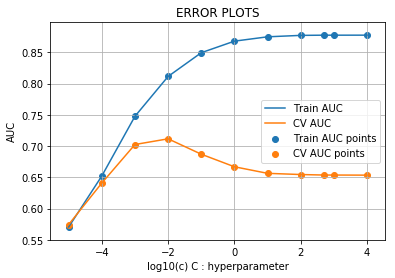

In [323]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import math

c_values = [0.00001,0.0001,0.001,0.01,0.1,1,10,100,500,1000,10000]
train_auc = []
cv_auc = []
log_c = []

for c in tqdm(c_values):
    lr = LogisticRegression(C = c)
    lr.fit(X_tr, y_train)
    
    y_train_pred = lr.predict_proba(X_tr)[:,1]    
    y_cv_pred = lr.predict_proba(X_cr)[:,1]  
    
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))
    
    log_c.append(math.log10(c))

plt.plot(log_c, train_auc, label='Train AUC')
plt.plot(log_c, cv_auc, label='CV AUC')

plt.scatter(log_c, train_auc, label='Train AUC points')
plt.scatter(log_c, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("log10(c) C : hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()



In [324]:
best_c = 0.001

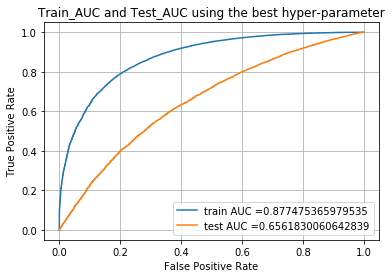

In [325]:
from sklearn.metrics import roc_curve, auc


lr = LogisticRegression(C = c)
lr.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = lr.predict_proba(X_tr)[:,1]    
y_test_pred = lr.predict_proba(X_te)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Train_AUC and Test_AUC using the best hyper-parameter")
plt.grid()
plt.show()

In [326]:
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

the maximum value of tpr*(1-fpr) 0.6318076526392862 for threshold 0.833


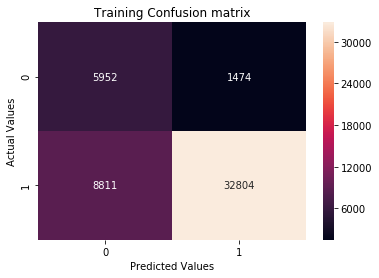

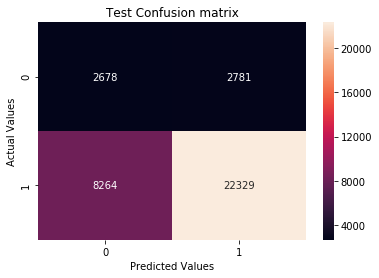

In [327]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
df_cm = confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t))
ax = sns.heatmap(df_cm,annot=True, fmt="d")
plt.title("Training Confusion matrix")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

df_cm = confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t))
ax = sns.heatmap(df_cm,annot=True, fmt="d")
plt.title("Test Confusion matrix")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

In [328]:
results = [['BOW',best_c,auc(train_fpr, train_tpr)]]
results

[['BOW', 0.001, 0.877475365979535]]

## Set 2 using TF-IDF

In [329]:
from scipy.sparse import hstack

X_tr = hstack((X_train_essay_idf, X_train_title_idf,X_train_school_ohe, X_train_clean_categories_ohe,X_train_clean_subcategories_ohe,X_train_project_grade_category_ohe , X_train_teacher_prefix_ohe, X_train_price_norm, X_train_tnopp_norm)).tocsr()
X_cr = hstack((X_cv_essay_idf, X_cv_title_idf,X_cv_school_ohe, X_cv_clean_categories_ohe,X_cv_clean_subcategories_ohe,X_cv_project_grade_category_ohe , X_cv_teacher_prefix_ohe, X_cv_price_norm, X_cv_tnopp_norm)).tocsr()
X_te = hstack((X_test_essay_idf, X_test_title_idf,X_test_school_ohe, X_test_clean_categories_ohe,X_test_clean_subcategories_ohe,X_test_project_grade_category_ohe , X_test_teacher_prefix_ohe, X_test_price_norm, X_test_tnopp_norm)).tocsr()

print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(49041, 7324) (49041,)
(24155, 7324) (24155,)
(36052, 7324) (36052,)






  0%|                                                                                           | 0/10 [00:00<?, ?it/s]



 10%|████████▎                                                                          | 1/10 [00:00<00:03,  2.51it/s]



 20%|████████████████▌                                                                  | 2/10 [00:01<00:03,  2.06it/s]



 30%|████████████████████████▉                                                          | 3/10 [00:02<00:04,  1.55it/s]



 40%|█████████████████████████████████▏                                                 | 4/10 [00:03<00:05,  1.15it/s]



 50%|█████████████████████████████████████████▌                                         | 5/10 [00:06<00:08,  1.63s/it]



 60%|█████████████████████████████████████████████████▊                                 | 6/10 [00:14<00:13,  3.32s/it]



 70%|██████████████████████████████████████████████████████████                         | 7/10 [00:32<00:23,  7.79s/it]



 80%|███████

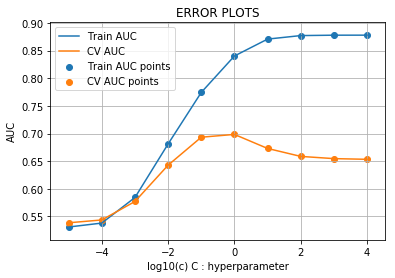

In [330]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import math

c_values = [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
train_auc = []
cv_auc = []
log_c = []

for c in tqdm(c_values):
    lr = LogisticRegression(C = c)
    lr.fit(X_tr, y_train)
    
    y_train_pred = lr.predict_proba( X_tr)[:,1]    
    y_cv_pred = lr.predict_proba( X_cr)[:,1]
    
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))
    
    log_c.append(math.log10(c))

plt.plot(log_c, train_auc, label='Train AUC')
plt.plot(log_c, cv_auc, label='CV AUC')

plt.scatter(log_c, train_auc, label='Train AUC points')
plt.scatter(log_c, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("log10(c) C : hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()



In [331]:
best_c = 0.1

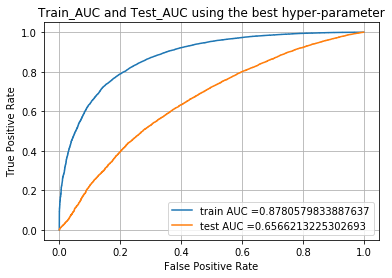

In [332]:
from sklearn.metrics import roc_curve, auc


lr = LogisticRegression(C = c)
lr.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = lr.predict_proba( X_tr)[:,1]    
y_test_pred = lr.predict_proba( X_te)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Train_AUC and Test_AUC using the best hyper-parameter")
plt.grid()
plt.show()

the maximum value of tpr*(1-fpr) 0.6320540729324724 for threshold 0.839


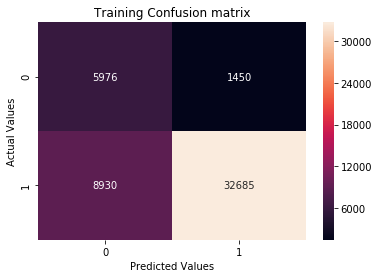

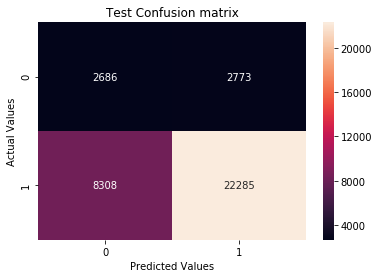

In [333]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
df_cm = confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t))
ax = sns.heatmap(df_cm,annot=True, fmt="d")
plt.title("Training Confusion matrix")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

df_cm = confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t))
ax = sns.heatmap(df_cm,annot=True, fmt="d")
plt.title("Test Confusion matrix")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

In [334]:
results_2 = [['TF-IDF',best_c,auc(train_fpr, train_tpr)]]
results_2

[['TF-IDF', 0.1, 0.8780579833887637]]

## Set 3 using AVG-W2V

In [335]:
from scipy.sparse import hstack

# avg_w2v_vectors_train,w2v_title_train

X_tr = hstack((avg_w2v_vectors_train, w2v_title_train,X_train_school_ohe, X_train_clean_categories_ohe,X_train_clean_subcategories_ohe,X_train_project_grade_category_ohe , X_train_teacher_prefix_ohe, X_train_price_norm, X_train_tnopp_norm)).tocsr()
X_cr = hstack((avg_w2v_vectors_cv, w2v_title_cv,X_cv_school_ohe, X_cv_clean_categories_ohe,X_cv_clean_subcategories_ohe,X_cv_project_grade_category_ohe , X_cv_teacher_prefix_ohe, X_cv_price_norm, X_cv_tnopp_norm)).tocsr()
X_te = hstack((avg_w2v_vectors_test, w2v_title_test,X_test_school_ohe, X_test_clean_categories_ohe,X_test_clean_subcategories_ohe,X_test_project_grade_category_ohe , X_test_teacher_prefix_ohe, X_test_price_norm, X_test_tnopp_norm)).tocsr()

print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(49041, 924) (49041,)
(24155, 924) (24155,)
(36052, 924) (36052,)






  0%|                                                                                            | 0/8 [00:00<?, ?it/s]



 12%|██████████▌                                                                         | 1/8 [00:01<00:13,  1.95s/it]



 25%|█████████████████████                                                               | 2/8 [00:03<00:11,  1.84s/it]



 38%|███████████████████████████████▌                                                    | 3/8 [00:06<00:10,  2.12s/it]



 50%|██████████████████████████████████████████                                          | 4/8 [00:12<00:13,  3.32s/it]



 62%|████████████████████████████████████████████████████▌                               | 5/8 [00:23<00:16,  5.55s/it]



 75%|███████████████████████████████████████████████████████████████                     | 6/8 [00:49<00:23, 11.76s/it]



 88%|█████████████████████████████████████████████████████████████████████████▌          | 7/8 [01:39<00:23, 23.38s/it]



100%|███████

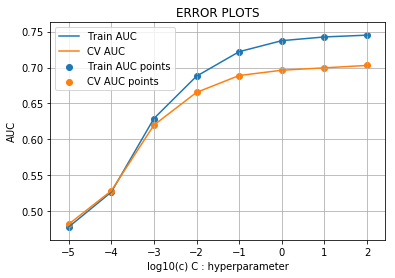

In [336]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import math

c_values = [0.00001,0.0001,0.001,0.01,0.1,1,10,100]
train_auc = []
cv_auc = []
log_c = []

for c in tqdm(c_values):
    lr = LogisticRegression(C = c)
    lr.fit(X_tr, y_train)
    
    y_train_pred = lr.predict_proba( X_tr)[:,1]    
    y_cv_pred = lr.predict_proba( X_cr)[:,1]
    
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))
    
    log_c.append(math.log10(c))

plt.plot(log_c, train_auc, label='Train AUC')
plt.plot(log_c, cv_auc, label='CV AUC')

plt.scatter(log_c, train_auc, label='Train AUC points')
plt.scatter(log_c, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("log10(c) C : hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()



In [337]:
best_c = 1

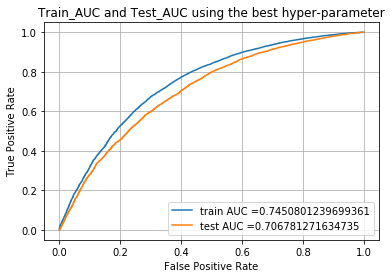

In [338]:
from sklearn.metrics import roc_curve, auc


lr = LogisticRegression(C = c)
lr.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = lr.predict_proba( X_tr)[:,1]    
y_test_pred = lr.predict_proba( X_te)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Train_AUC and Test_AUC using the best hyper-parameter")
plt.grid()
plt.show()

the maximum value of tpr*(1-fpr) 0.4721433883159205 for threshold 0.843


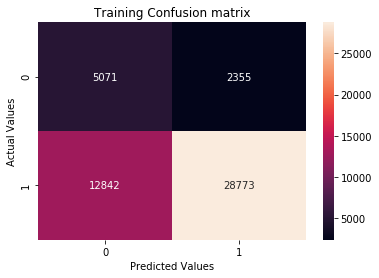

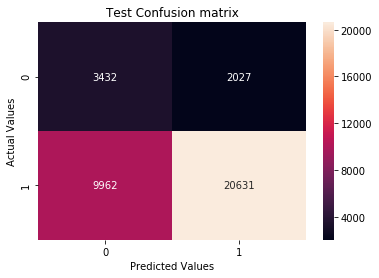

In [339]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
df_cm = confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t))
ax = sns.heatmap(df_cm,annot=True, fmt="d")
plt.title("Training Confusion matrix")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

df_cm = confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t))
ax = sns.heatmap(df_cm,annot=True, fmt="d")
plt.title("Test Confusion matrix")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

In [340]:
results_3 = [['Average W2v',best_c,auc(train_fpr, train_tpr)]]
results_3

[['Average W2v', 1, 0.7450801239699361]]

## TF-IDF weighted AVG-W2V

In [341]:
X_tr = hstack((tfidf_w2v_vectors_train, tfidf_w2v_title_train,X_train_school_ohe, X_train_clean_categories_ohe,X_train_clean_subcategories_ohe,X_train_project_grade_category_ohe , X_train_teacher_prefix_ohe, X_train_price_norm, X_train_tnopp_norm)).tocsr()
X_cr = hstack((tfidf_w2v_vectors_cv, tfidf_w2v_title_cv,X_cv_school_ohe, X_cv_clean_categories_ohe,X_cv_clean_subcategories_ohe,X_cv_project_grade_category_ohe , X_cv_teacher_prefix_ohe, X_cv_price_norm, X_cv_tnopp_norm)).tocsr()
X_te = hstack((tfidf_w2v_vectors_test, tfidf_w2v_title_test,X_test_school_ohe, X_test_clean_categories_ohe,X_test_clean_subcategories_ohe,X_test_project_grade_category_ohe , X_test_teacher_prefix_ohe, X_test_price_norm, X_test_tnopp_norm)).tocsr()

print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(49041, 924) (49041,)
(24155, 924) (24155,)
(36052, 924) (36052,)






  0%|                                                                                            | 0/8 [00:00<?, ?it/s]



 12%|██████████▌                                                                         | 1/8 [00:01<00:12,  1.72s/it]



 25%|█████████████████████                                                               | 2/8 [00:03<00:10,  1.69s/it]



 38%|███████████████████████████████▌                                                    | 3/8 [00:06<00:10,  2.05s/it]



 50%|██████████████████████████████████████████                                          | 4/8 [00:12<00:12,  3.17s/it]



 62%|████████████████████████████████████████████████████▌                               | 5/8 [00:23<00:17,  5.69s/it]



 75%|███████████████████████████████████████████████████████████████                     | 6/8 [00:47<00:22, 11.26s/it]



 88%|█████████████████████████████████████████████████████████████████████████▌          | 7/8 [01:40<00:23, 23.56s/it]



100%|███████

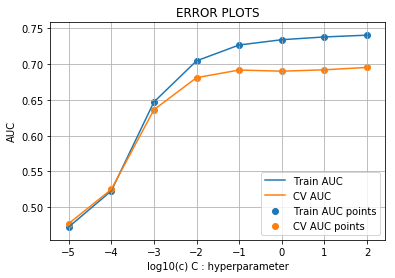

In [342]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import math

c_values = [0.00001,0.0001,0.001,0.01,0.1,1,10,100]
train_auc = []
cv_auc = []
log_c = []

for c in tqdm(c_values):
    lr = LogisticRegression(C = c)
    lr.fit(X_tr, y_train)
    
    y_train_pred = lr.predict_proba( X_tr)[:,1]    
    y_cv_pred = lr.predict_proba( X_cr)[:,1]
    
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))
    
    log_c.append(math.log10(c))

plt.plot(log_c, train_auc, label='Train AUC')
plt.plot(log_c, cv_auc, label='CV AUC')

plt.scatter(log_c, train_auc, label='Train AUC points')
plt.scatter(log_c, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("log10(c) C : hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()



In [343]:
best_c = 1

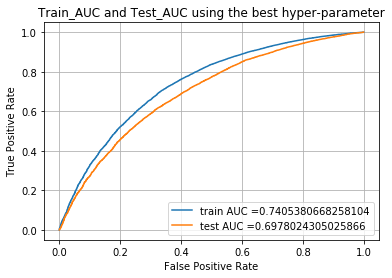

In [344]:
from sklearn.metrics import roc_curve, auc


lr = LogisticRegression(C = c)
lr.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = lr.predict_proba( X_tr)[:,1]    
y_test_pred = lr.predict_proba( X_te)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Train_AUC and Test_AUC using the best hyper-parameter")
plt.grid()
plt.show()

the maximum value of tpr*(1-fpr) 0.4679322618598099 for threshold 0.833


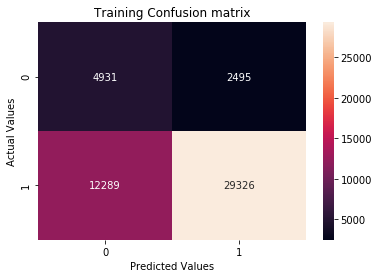

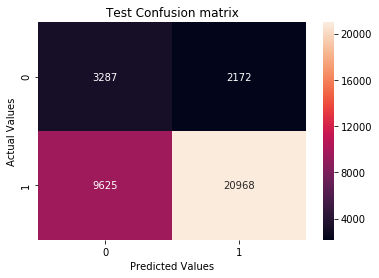

In [345]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
df_cm = confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t))
ax = sns.heatmap(df_cm,annot=True, fmt="d")
plt.title("Training Confusion matrix")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

df_cm = confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t))
ax = sns.heatmap(df_cm,annot=True, fmt="d")
plt.title("Test Confusion matrix")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

In [346]:
results_4 = [['TF-IDF Weighted W2V',best_c,auc(train_fpr, train_tpr)]]
results_4

[['TF-IDF Weighted W2V', 1, 0.7405380668258104]]

<h2>2.5 Logistic Regression with added Features `Set 5` </h2>

In [347]:
print(X_train_sentiment_norm.shape)
print(X_train_words_title_norm.shape)
print(X_train_words_essay_norm.shape)
print(X_train_quantity_norm.shape)

(1, 49041)
(1, 49041)
(1, 49041)
(1, 49041)


In [348]:
X_train_sentiment_norm = X_train_sentiment_norm.T
X_train_words_title_norm = X_train_words_title_norm.T
X_train_words_essay_norm = X_train_words_essay_norm.T
X_train_quantity_norm = X_train_quantity_norm.T

X_cv_sentiment_norm = X_cv_sentiment_norm.T
X_cv_words_title_norm = X_cv_words_title_norm.T
X_cv_words_essay_norm = X_cv_words_essay_norm.T
X_cv_quantity_norm = X_cv_quantity_norm.T

X_test_sentiment_norm = X_test_sentiment_norm.T
X_test_words_title_norm = X_test_words_title_norm.T
X_test_words_essay_norm = X_test_words_essay_norm.T
X_test_quantity_norm = X_test_quantity_norm.T

In [357]:
X_tr = hstack((X_train_sentiment_norm, X_train_words_title_norm,X_train_words_essay_norm,X_train_quantity_norm,X_train_school_ohe, X_train_clean_categories_ohe,X_train_clean_subcategories_ohe,X_train_project_grade_category_ohe , X_train_teacher_prefix_ohe, X_train_price_norm, X_train_tnopp_norm)).tocsr()
X_cr = hstack((X_cv_sentiment_norm, X_cv_words_title_norm,X_cv_words_essay_norm,X_cv_quantity_norm,X_cv_school_ohe, X_cv_clean_categories_ohe,X_cv_clean_subcategories_ohe,X_cv_project_grade_category_ohe , X_cv_teacher_prefix_ohe, X_cv_price_norm, X_cv_tnopp_norm)).tocsr()
X_te = hstack((X_test_sentiment_norm, X_test_words_title_norm,X_test_words_essay_norm,X_test_quantity_norm,X_test_school_ohe, X_test_clean_categories_ohe,X_test_clean_subcategories_ohe,X_test_project_grade_category_ohe , X_test_teacher_prefix_ohe, X_test_price_norm, X_test_tnopp_norm)).tocsr()

print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(49041, 328) (49041,)
(24155, 328) (24155,)
(36052, 328) (36052,)






  0%|                                                                                           | 0/10 [00:00<?, ?it/s]



 10%|████████▎                                                                          | 1/10 [00:00<00:01,  6.92it/s]



 20%|████████████████▌                                                                  | 2/10 [00:00<00:01,  6.71it/s]



 30%|████████████████████████▉                                                          | 3/10 [00:00<00:01,  6.03it/s]



 40%|█████████████████████████████████▏                                                 | 4/10 [00:00<00:01,  4.39it/s]



 50%|█████████████████████████████████████████▌                                         | 5/10 [00:01<00:01,  2.96it/s]



 60%|█████████████████████████████████████████████████▊                                 | 6/10 [00:03<00:03,  1.19it/s]



 70%|██████████████████████████████████████████████████████████                         | 7/10 [00:08<00:06,  2.15s/it]



 80%|███████

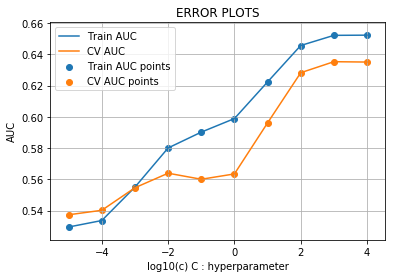

In [358]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import math

c_values = [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
train_auc = []
cv_auc = []
log_c = []

for c in tqdm(c_values):
    lr = LogisticRegression(C = c)
    lr.fit(X_tr, y_train)
    
    y_train_pred = lr.predict_proba( X_tr)[:,1]    
    y_cv_pred = lr.predict_proba( X_cr)[:,1]
    
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))
    
    log_c.append(math.log10(c))

plt.plot(log_c, train_auc, label='Train AUC')
plt.plot(log_c, cv_auc, label='CV AUC')

plt.scatter(log_c, train_auc, label='Train AUC points')
plt.scatter(log_c, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("log10(c) C : hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()



In [359]:
best_c = 100

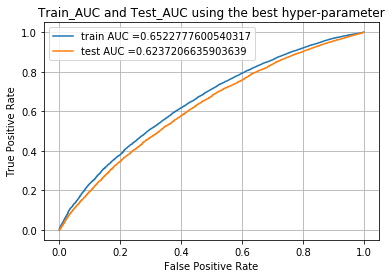

In [360]:
from sklearn.metrics import roc_curve, auc


lr = LogisticRegression(C = c)
lr.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = lr.predict_proba( X_tr)[:,1]    
y_test_pred = lr.predict_proba( X_te)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Train_AUC and Test_AUC using the best hyper-parameter")
plt.grid()
plt.show()

the maximum value of tpr*(1-fpr) 0.37139282443599303 for threshold 0.847


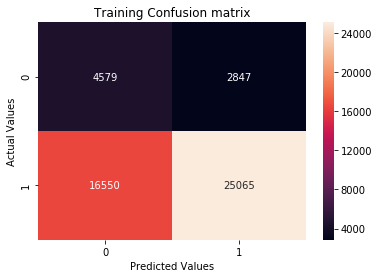

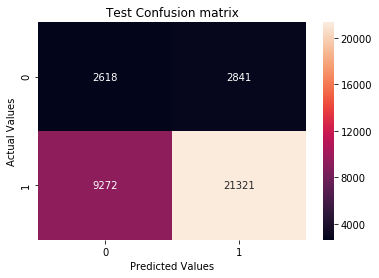

In [361]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
df_cm = confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t))
ax = sns.heatmap(df_cm,annot=True, fmt="d")
plt.title("Training Confusion matrix")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

df_cm = confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t))
ax = sns.heatmap(df_cm,annot=True, fmt="d")
plt.title("Test Confusion matrix")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

In [362]:
results_5 = [['Step-5',best_c,auc(train_fpr, train_tpr)]]
results_5

[['Step-5', 100, 0.6522777600540317]]

<h1>3. Conclusion</h1>

In [363]:
# Please compare all your models using Prettytable library
from tabulate import tabulate

final_results = results.copy()
final_results.append(results_2[0])
final_results.append(results_3[0])
final_results.append(results_4[0])
final_results.append(results_5[0])
final_results
print(tabulate(final_results, headers=['Vectorizer','Alpha Value','AUC'],tablefmt='orgtbl'))

| Vectorizer          |   Alpha Value |      AUC |
|---------------------+---------------+----------|
| BOW                 |         0.001 | 0.877475 |
| TF-IDF              |         0.1   | 0.878058 |
| Average W2v         |         1     | 0.74508  |
| TF-IDF Weighted W2V |         1     | 0.740538 |
| Step-5              |       100     | 0.652278 |
